# Tiền xử lý dữ liệu

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv("D:\\workspace\\hus\\machine-learning\\project\\data\\city_day.csv" )

# Hiển thị kích thước dữ liệu
print(f"Kích thước dữ liệu: {df.shape}")

# Xem 5 bản ghi đầu tiên
print("\n5 bản ghi đầu tiên:")
print(df.head())

# Thông tin về kiểu dữ liệu và số lượng dữ liệu không bị thiếu
print("\nThông tin về dữ liệu:")
print(df.info())

# Thống kê mô tả cho các trường số
print("\nThống kê mô tả cho các trường số:")
print(df.describe())

# Kiểm tra các giá trị bị thiếu
print("\nSố lượng giá trị bị thiếu trong mỗi trường:")
print(df.isnull().sum())

# Kiểm tra số lượng thành phố và ngày trong dữ liệu
print(f"\nSố lượng thành phố: {df['City'].nunique()}")
print(f"Các thành phố: {df['City'].unique()}")
print(f"Khoảng thời gian: từ {df['Date'].min()} đến {df['Date'].max()}")

Kích thước dữ liệu: (29531, 16)

5 bản ghi đầu tiên:
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  

Thông tin về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #  

In [4]:
# Chuyển đổi cột Date sang định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

# Thêm các cột năm, tháng, ngày để phân tích theo thời gian
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Kiểm tra các giá trị ngoại lai cho các chỉ số ô nhiễm
numeric_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Xử lý giá trị thiếu
# Phương pháp 1: Điền giá trị thiếu bằng giá trị trung bình theo thành phố
for col in numeric_cols:
    city_means = df.groupby('City')[col].transform('mean')
    df[col].fillna(city_means, inplace=True)
    
# Nếu vẫn còn giá trị NA (có thể xảy ra nếu một thành phố không có dữ liệu nào cho một chỉ số cụ thể)
# thì điền bằng giá trị trung bình của tất cả các thành phố
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Xử lý AQI_Bucket
# Điền các giá trị thiếu bằng cách ánh xạ từ giá trị AQI
def map_aqi_to_bucket(aqi):
    if pd.isna(aqi):
        return None
    elif aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

# Điền giá trị thiếu cho AQI_Bucket
df['AQI_Bucket'] = df.apply(lambda row: row['AQI_Bucket'] if pd.notna(row['AQI_Bucket']) else map_aqi_to_bucket(row['AQI']), axis=1)

# Kiểm tra lại các giá trị thiếu sau khi xử lý
print("\nSố lượng giá trị bị thiếu sau khi xử lý:")
print(df.isnull().sum())

C:\Users\doquo\AppData\Local\Temp\ipykernel_10948\999035102.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(city_means, inplace=True)
C:\Users\doquo\AppData\Local\Temp\ipykernel_10948\999035102.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh


Số lượng giá trị bị thiếu sau khi xử lý:
City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
Year          0
Month         0
Day           0
dtype: int64


In [5]:
# Phát hiện và xử lý các giá trị ngoại lai
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Thay thế các giá trị ngoại lai bằng giới hạn trên/dưới
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [6]:
# Chuyển đổi cột AQI_Bucket sang one-hot encoding
aqi_bucket_dummies = pd.get_dummies(df['AQI_Bucket'], prefix='AQI_Bucket')
df = pd.concat([df, aqi_bucket_dummies], axis=1)

# Chuyển đổi cột City sang one-hot encoding
city_dummies = pd.get_dummies(df['City'], prefix='City')
df = pd.concat([df, city_dummies], axis=1)

In [7]:
# Chuẩn hóa các biến số về thang đo từ 0-1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = df.copy()

for col in numeric_cols:
    df_normalized[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

# Kiểm tra kết quả chuẩn hóa
print("\nThống kê mô tả sau khi chuẩn hóa:")
print(df_normalized[numeric_cols].describe())


Thống kê mô tả sau khi chuẩn hóa:
              PM2.5          PM10            NO           NO2           NOx  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean       0.417653      0.482570      0.337301      0.365861      0.375235   
std        0.266437      0.239369      0.279034      0.255096      0.265757   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.222187      0.280006      0.128746      0.164999      0.179692   
50%        0.349598      0.476491      0.232444      0.309857      0.324062   
75%        0.533312      0.568003      0.477248      0.499000      0.507815   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                NH3            CO           SO2            O3       Benzene  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean       0.409473      0.375335      0.414446      0.433168      0.280646   
std        0.260

# PCA

Số lượng thành phần chính được giữ lại: 10
Tỉ lệ phương sai giải thích: [0.35626701 0.12364254 0.09678497 0.0841864  0.07639038 0.06595927
 0.04814597 0.04238884 0.03168371 0.02458137]
Tổng tỉ lệ phương sai giải thích: 0.9500304640925653


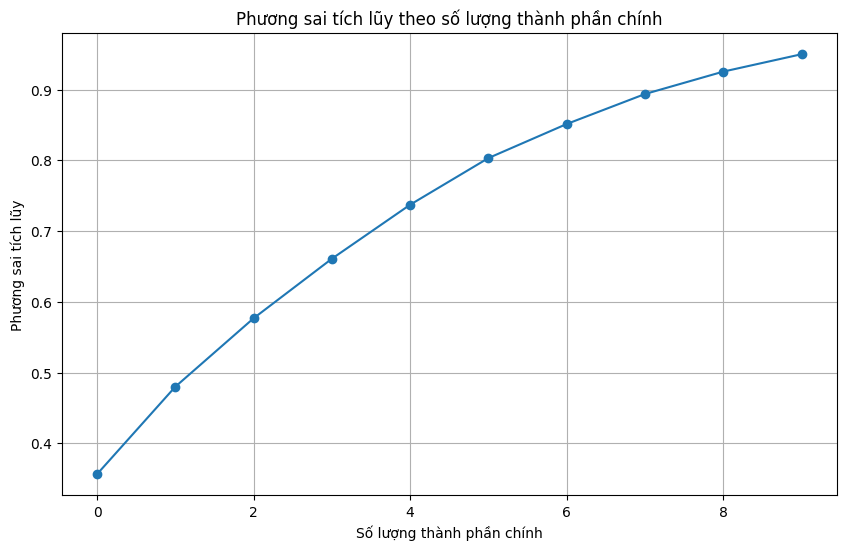

Kích thước dữ liệu ban đầu: (29531, 13)
Kích thước dữ liệu sau khi giảm chiều: (29531, 10)


In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Chọn các cột số để thực hiện PCA
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_columns]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Khởi tạo PCA với tham số n_components=0.95 để giữ 95% thông tin
pca = PCA(n_components=0.95)

# Áp dụng PCA
X_pca = pca.fit_transform(X_scaled)

# Hiển thị số lượng thành phần được giữ lại
print(f"Số lượng thành phần chính được giữ lại: {pca.n_components_}")
print(f"Tỉ lệ phương sai giải thích: {pca.explained_variance_ratio_}")
print(f"Tổng tỉ lệ phương sai giải thích: {sum(pca.explained_variance_ratio_)}")

# Visualize số lượng thành phần chính và phương sai tích lũy
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Phương sai tích lũy')
plt.title('Phương sai tích lũy theo số lượng thành phần chính')
plt.grid(True)
plt.show()

# Hiển thị kích thước của dữ liệu sau khi giảm chiều
print(f"Kích thước dữ liệu ban đầu: {X_scaled.shape}")
print(f"Kích thước dữ liệu sau khi giảm chiều: {X_pca.shape}")

# Phân tích chi tiết PCA và so sánh với t-SNE

## 1. Phân tích thống kê mô tả của dữ liệu

Thống kê mô tả cho dữ liệu gốc:


PM2.5          PM10            NO           NO2           NOx  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      59.796686    109.904446     15.975179     27.438577     30.487856   
std       38.121104     54.510896     13.199008     19.124515     21.592776   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       31.830000     63.775000      6.110000     12.380000     14.600000   
50%       50.059571    108.520000     11.015184     23.240000     26.330000   
75%       76.345000    129.360000     22.595000     37.420000     41.260000   
max      143.117500    227.737500     47.322500     74.980000     81.250000   

                NH3            CO           SO2            O3       Benzene  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      20.974452      1.131634     12.753181     33.629237      2.197187   
std       13.324066      0.868505      8.781758     18.033607      2.240971   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%       10.977550      0.540000      6.070000     19.960000      0.220000   
50%       18.371518      0.910000      9.949676     32.868086      1.620000   
75%       27.070000      1.530000     15.945000     43.025000      3.263615   
max       51.208675      3.015000     30.757500     77.622500      7.829038   

            Toluene        Xylene           AQI  
count  29531.000000  29531.000000  29531.000000  
mean       6.122462      2.683577    161.156056  
std        6.293483      1.758886    105.204065  
min        0.000000      0.000000     13.000000  
25%        0.690000      1.170000     87.000000  
50%        4.340000      3.114350    119.000000  
75%        8.276830      3.114350    215.000000  
max       19.657074      6.030874    407.000000

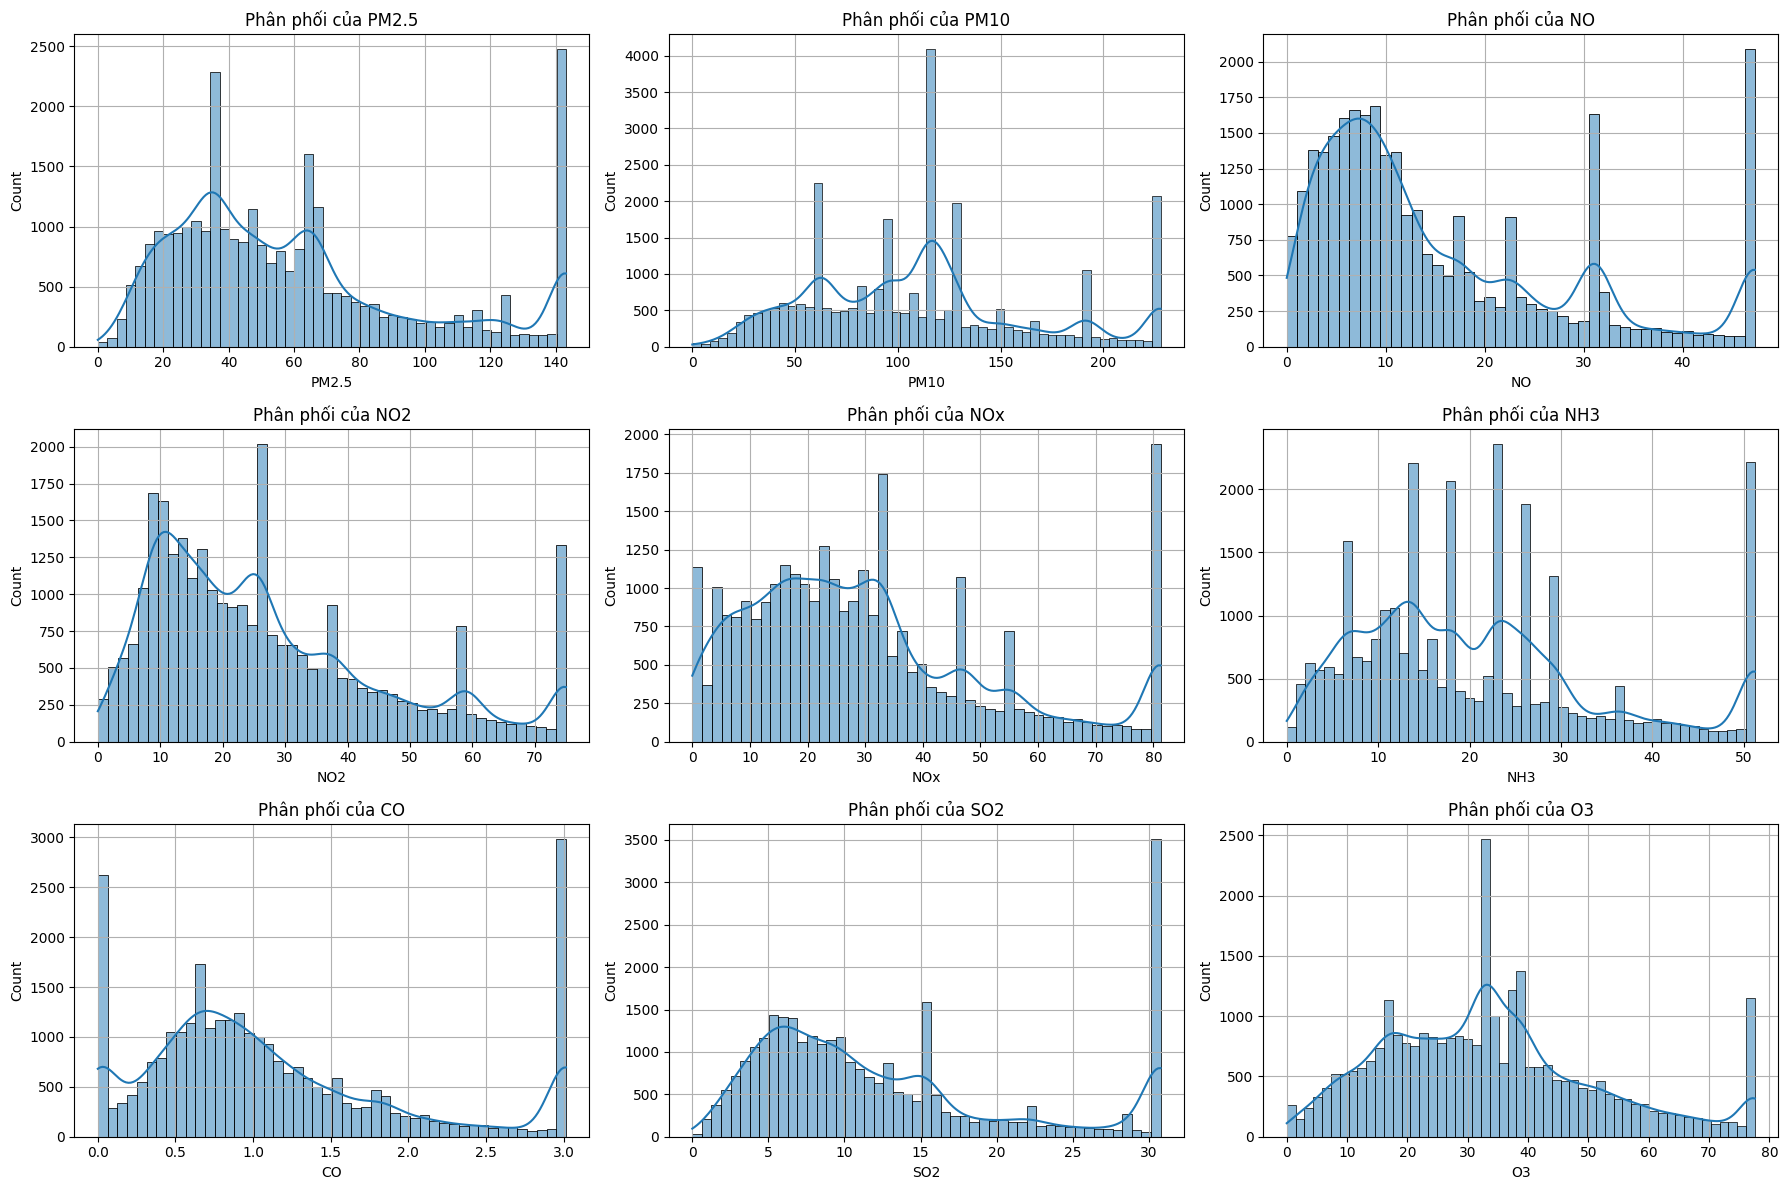

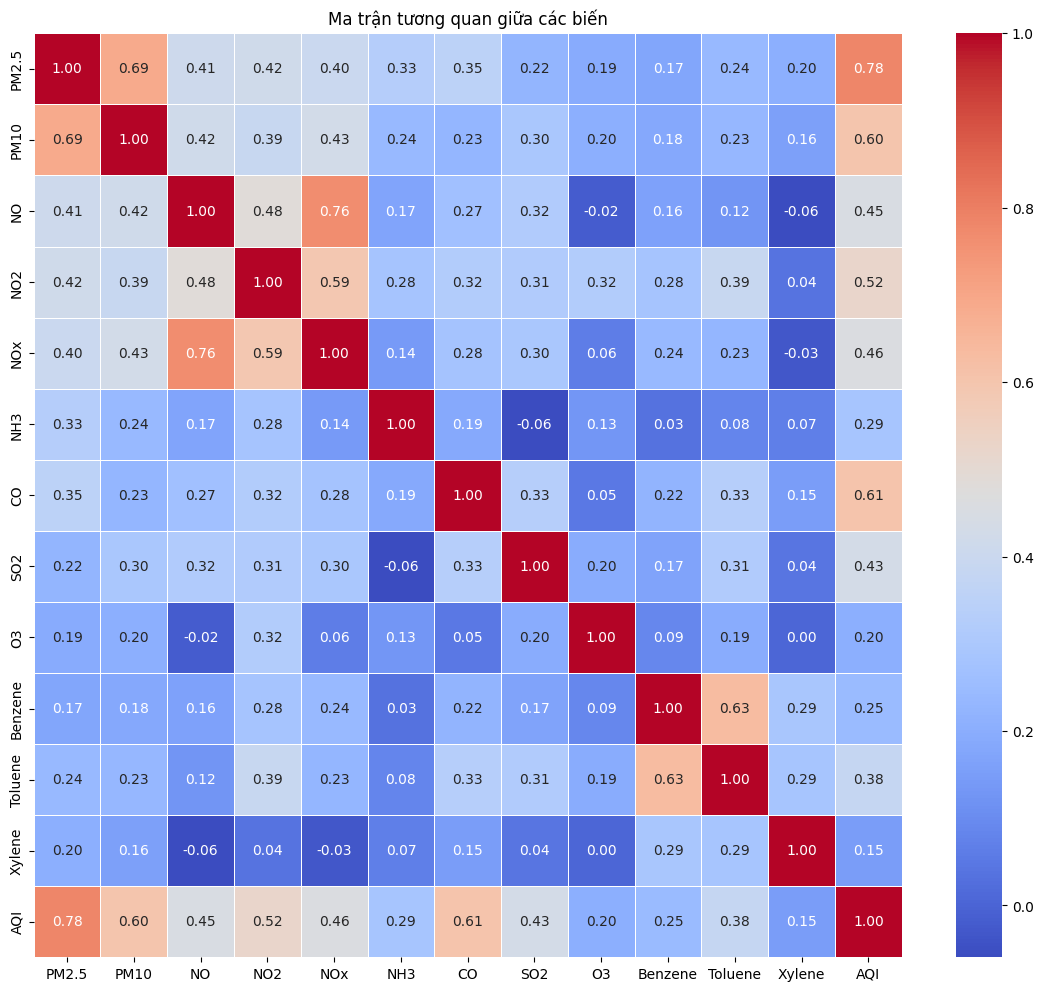


Top 5 cặp biến có tương quan cao nhất:
PM2.5 - AQI: 0.7827
NO - NOx: 0.7649
PM2.5 - PM10: 0.6879
Benzene - Toluene: 0.6337
CO - AQI: 0.6058


In [9]:
# 1.1. Phân tích thống kê mô tả cho từng trường dữ liệu
numeric_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Hiển thị thống kê cho dữ liệu gốc
print("Thống kê mô tả cho dữ liệu gốc:")
stats_original = df[numeric_features].describe()
display(stats_original)

# Biểu đồ phân phối cho các trường chính
plt.figure(figsize=(18, 12))
for i, column in enumerate(numeric_features[:9], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Phân phối của {column}')
    plt.grid(True)
plt.tight_layout()
plt.show()

# Ma trận tương quan giữa các biến
plt.figure(figsize=(14, 12))
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Ma trận tương quan giữa các biến')
plt.show()

# Hiển thị top 5 cặp biến có tương quan cao nhất
corr_pairs = []
for i in range(len(numeric_features)):
    for j in range(i+1, len(numeric_features)):
        corr_pairs.append((numeric_features[i], numeric_features[j], correlation_matrix.iloc[i, j]))

corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
print("\nTop 5 cặp biến có tương quan cao nhất:")
for var1, var2, corr in corr_pairs[:5]:
    print(f"{var1} - {var2}: {corr:.4f}")

## 2. Chuẩn hóa dữ liệu và phân tích thành phần chính


Thống kê mô tả cho dữ liệu đã chuẩn hóa:


PM2.5          PM10            NO           NO2           NOx  \
count  2.953100e+04  2.953100e+04  2.953100e+04  2.953100e+04  2.953100e+04   
mean  -2.579330e-16 -3.965238e-16 -1.616893e-16  9.624364e-17  1.462903e-16   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -1.567575e+00 -2.016043e+00 -1.208837e+00 -1.434235e+00 -1.411971e+00   
25%   -7.336398e-01 -8.462570e-01 -7.474308e-01 -7.874099e-01 -7.358074e-01   
50%   -2.554302e-01 -2.539803e-02 -3.757918e-01 -2.195427e-01 -1.925610e-01   
75%    4.341058e-01  3.569173e-01  5.015478e-01  5.219266e-01  4.988857e-01   
max    2.185724e+00  2.161679e+00  2.375016e+00  2.485931e+00  2.350925e+00   

                NH3            CO           SO2            O3       Benzene  \
count  2.953100e+04  2.953100e+04  2.953100e+04  2.953100e+04  2.953100e+04   
mean  -2.155858e-16  1.077929e-16  2.001868e-16 -1.347411e-16  1.539898e-16   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -1.573454e+00 -1.302990e+00 -1.451121e+00 -1.864286e+00 -9.804786e-01   
25%   -7.503018e-01 -6.812217e-01 -7.610429e-01 -7.579997e-01 -8.823052e-01   
50%   -1.953591e-01 -2.551950e-01 -3.192473e-01 -4.220811e-02 -2.575654e-01   
75%    4.574919e-01  4.586875e-01  3.634663e-01  5.210229e-01  4.758858e-01   
max    2.269182e+00  2.168551e+00  2.050230e+00  2.439557e+00  2.513172e+00   

            Toluene        Xylene  
count  2.953100e+04  2.953100e+04  
mean  -1.847878e-16 -2.155858e-16  
std    1.000017e+00  1.000017e+00  
min   -9.728422e-01 -1.525752e+00  
25%   -8.632031e-01 -8.605464e-01  
50%   -2.832282e-01  2.449164e-01  
75%    3.423231e-01  2.449164e-01  
max    2.150612e+00  1.903111e+00


Phương sai giải thích của từng thành phần:
PC1: 0.3294 (0.3294 tích lũy)
PC2: 0.1338 (0.4632 tích lũy)
PC3: 0.1026 (0.5658 tích lũy)
PC4: 0.0910 (0.6568 tích lũy)
PC5: 0.0768 (0.7336 tích lũy)
PC6: 0.0703 (0.8039 tích lũy)
PC7: 0.0504 (0.8543 tích lũy)
PC8: 0.0451 (0.8994 tích lũy)
PC9: 0.0340 (0.9334 tích lũy)
PC10: 0.0254 (0.9588 tích lũy)
PC11: 0.0239 (0.9827 tích lũy)
PC12: 0.0173 (1.0000 tích lũy)


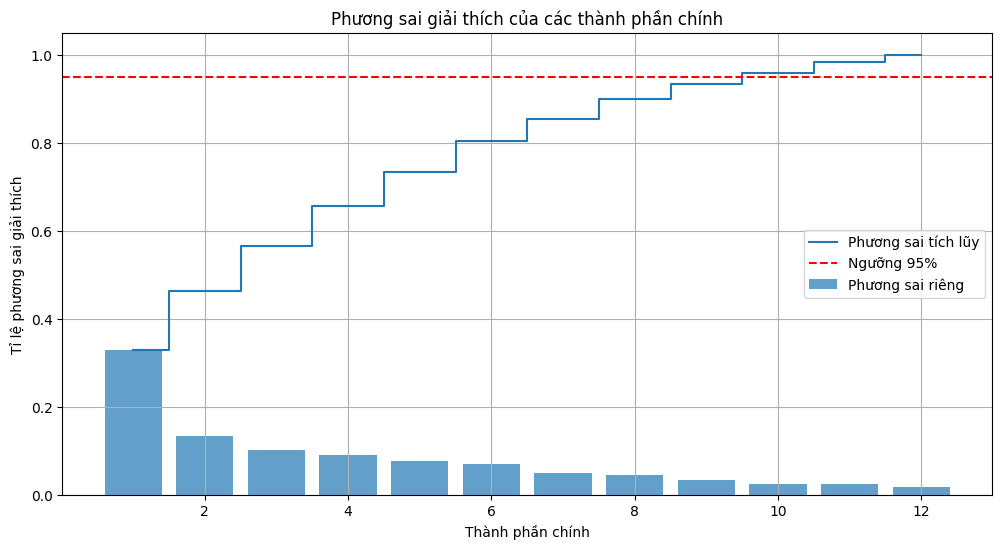


Số lượng thành phần cần thiết để giữ 95% phương sai: 10


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Chuẩn bị dữ liệu cho PCA
X = df[numeric_features].copy()
# Loại bỏ biến mục tiêu AQI để tránh rò rỉ thông tin
X_features = X.drop('AQI', axis=1)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_features.columns)

# Thống kê cho dữ liệu đã chuẩn hóa
print("\nThống kê mô tả cho dữ liệu đã chuẩn hóa:")
display(X_scaled_df.describe())

# Thực hiện PCA với n_components=12 (số lượng tối đa)
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Hiển thị phương sai giải thích cho mỗi thành phần
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("\nPhương sai giải thích của từng thành phần:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({cumulative_variance[i]:.4f} tích lũy)")

# Vẽ biểu đồ phương sai giải thích
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, label='Phương sai riêng')
plt.step(range(1, len(explained_variance)+1), cumulative_variance, where='mid', label='Phương sai tích lũy')
plt.axhline(y=0.95, color='r', linestyle='--', label='Ngưỡng 95%')
plt.xlabel('Thành phần chính')
plt.ylabel('Tỉ lệ phương sai giải thích')
plt.title('Phương sai giải thích của các thành phần chính')
plt.legend()
plt.grid(True)
plt.show()

# Xác định số lượng thành phần tối ưu để đạt 95% phương sai
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nSố lượng thành phần cần thiết để giữ 95% phương sai: {n_components_95}")

## 3. Phân tích các thành phần chính

Trọng số của các biến trong các thành phần chính:


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
PM2.5    0.359990 -0.105482  0.359288 -0.132004  0.263589 -0.140966 -0.276603   
PM10     0.351774 -0.126572  0.265269 -0.055568  0.311277 -0.351673 -0.350764   
NO       0.342685 -0.370779 -0.262837 -0.198698 -0.096500 -0.090912  0.172024   
NO2      0.380042 -0.081952 -0.030306  0.213383 -0.300630  0.035197  0.276189   
NOx      0.368665 -0.294279 -0.279522 -0.112782 -0.202237 -0.142353  0.211243   
NH3      0.174834 -0.121709  0.578706 -0.088716 -0.392486  0.409389  0.018746   
CO       0.275482  0.113893 -0.051182 -0.126373  0.249906  0.735595 -0.032092   
SO2      0.259515  0.049887 -0.339157  0.303561  0.514361  0.171904  0.078090   
O3       0.149609  0.094456  0.276008  0.780663 -0.030778 -0.128957  0.196671   
Benzene  0.242128  0.484662 -0.195908 -0.114513 -0.345825 -0.169143 -0.288609   
Toluene  0.286064  0.499944 -0.137813  0.067510 -0.188797  0.030989 -0.239020   
Xylene   0.110622  0.466930  0.257507 -0.372369  0.236187 -0.205512  0.680716   

              PC8       PC9      PC10  
PM2.5   -0.186016  0.087759 -0.073351  
PM10     0.052097  0.061737  0.004710  
NO       0.051344 -0.346552  0.201552  
NO2     -0.111714  0.652799 -0.398861  
NOx     -0.110734 -0.109655  0.186642  
NH3      0.508063 -0.151474  0.021735  
CO      -0.481305 -0.136073 -0.025871  
SO2      0.609433 -0.024698 -0.166561  
O3      -0.249818 -0.387730  0.115376  
Benzene  0.020105 -0.389901 -0.520400  
Toluene  0.102529  0.291740  0.668193  
Xylene   0.028081 -0.026043  0.023537

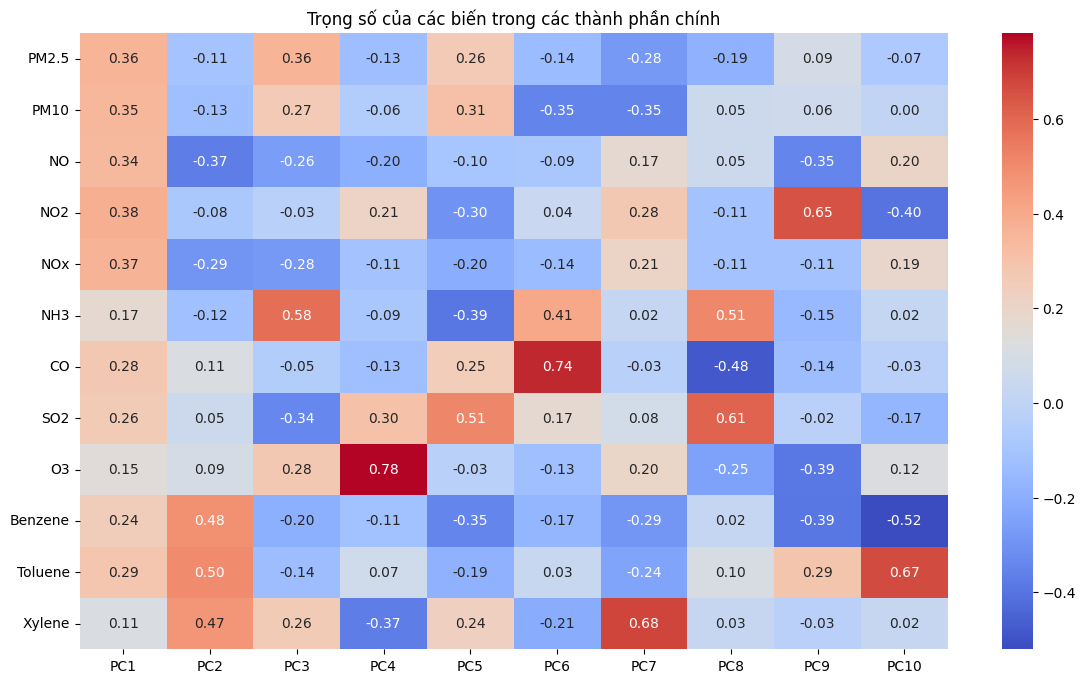

In [11]:
# Phân tích trọng số của các biến trong thành phần chính
loadings = pca_full.components_
loading_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=X_features.columns)

print("Trọng số của các biến trong các thành phần chính:")
display(loading_df.iloc[:, :n_components_95])

# Biểu diễn heatmap của trọng số
plt.figure(figsize=(14, 8))
sns.heatmap(loading_df.iloc[:, :n_components_95], cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Trọng số của các biến trong các thành phần chính')
plt.show()

# Tạo DataFrame với dữ liệu PCA
X_pca_df = pd.DataFrame(
    X_pca_full[:, :n_components_95], 
    columns=[f'PC{i+1}' for i in range(n_components_95)]
)
X_pca_df['AQI'] = df['AQI']

# Thêm cột AQI_Bucket để phân loại màu trong biểu đồ
X_pca_df['AQI_Bucket'] = df['AQI_Bucket']

## 4. Trực quan hóa các cặp thành phần chính (2D)

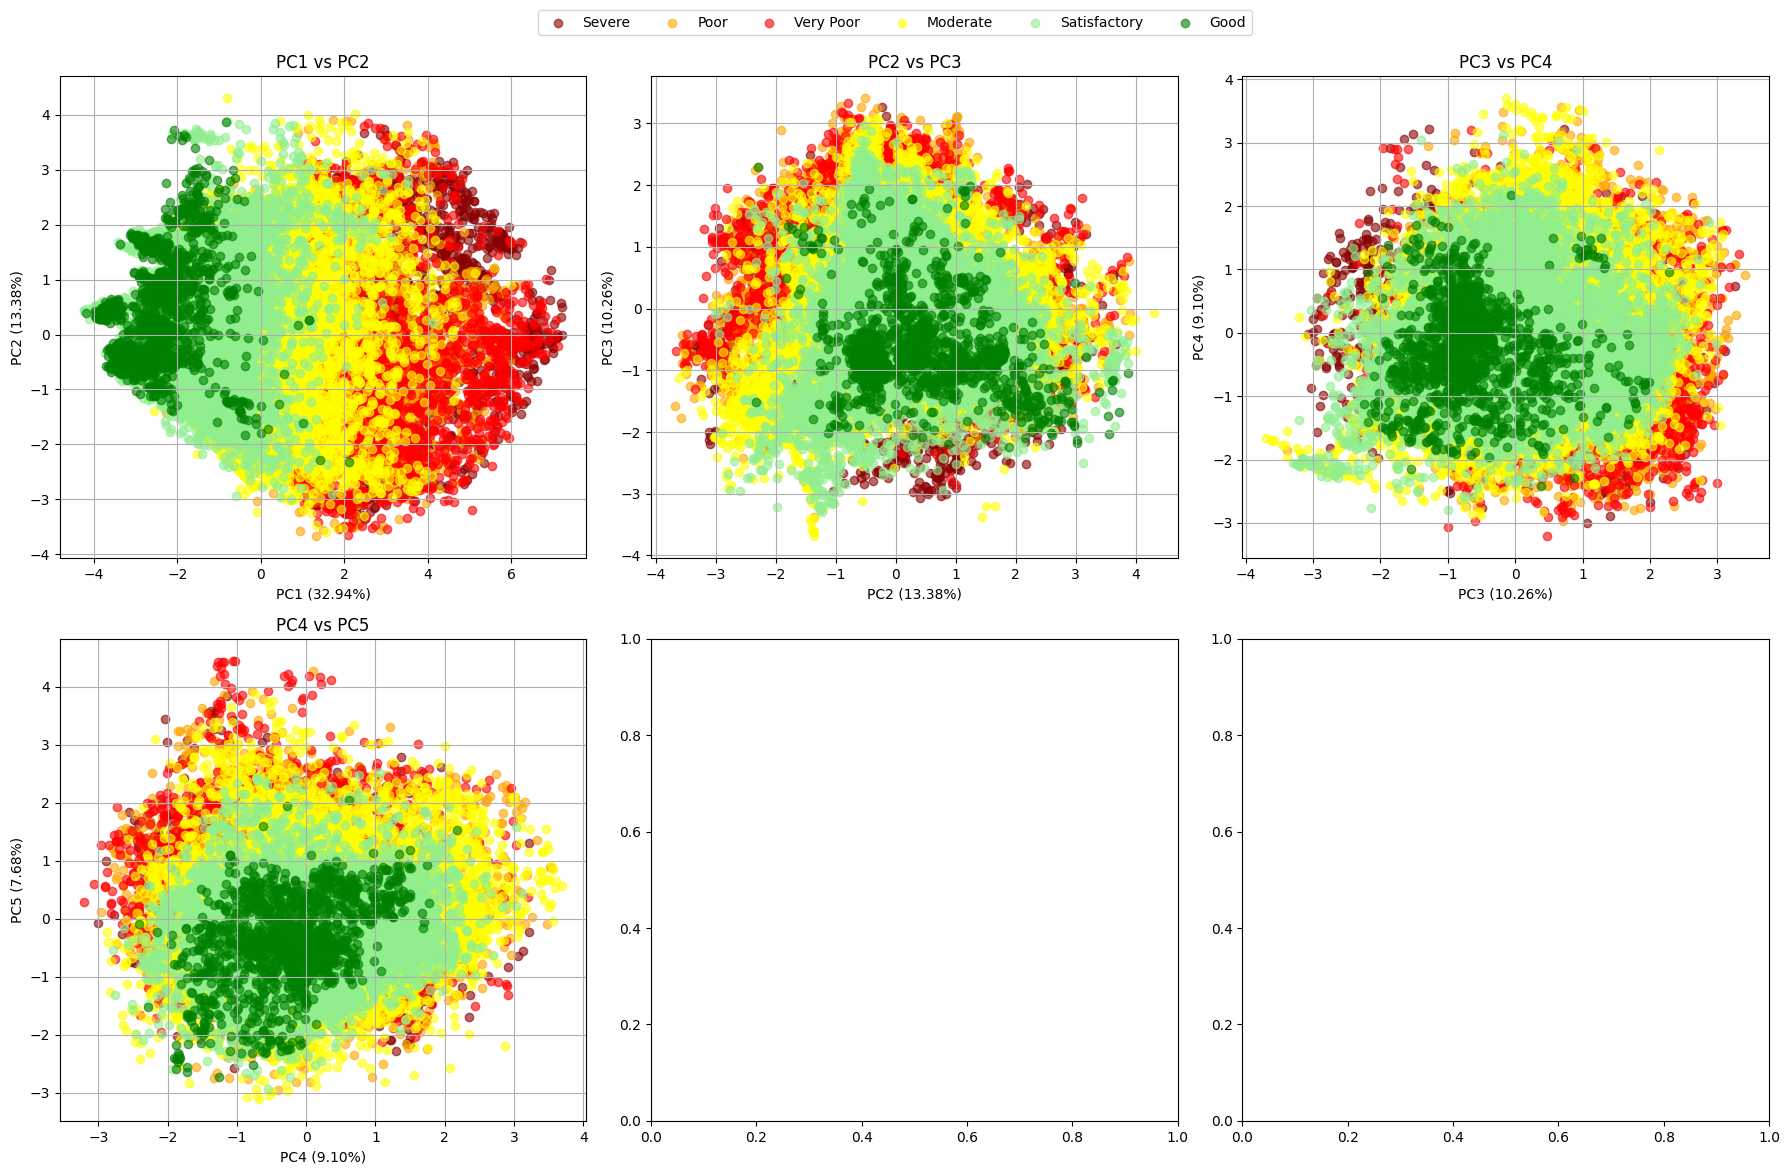

In [12]:
# Trực quan hóa các cặp thành phần chính
# Tạo color palette cho các mức AQI_Bucket
color_mapping = {
    'Good': 'green',
    'Satisfactory': 'lightgreen',
    'Moderate': 'yellow',
    'Poor': 'orange',
    'Very Poor': 'red',
    'Severe': 'darkred'
}

# Vẽ scatter plot cho các cặp thành phần chính
num_pairs = min(6, (n_components_95 * (n_components_95 - 1)) // 2)  # Tối đa 6 cặp
pairs = []
for i in range(min(4, n_components_95)):
    for j in range(i+1, min(i+2, n_components_95)):
        pairs.append((i, j))
        if len(pairs) >= num_pairs:
            break
    if len(pairs) >= num_pairs:
        break

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (pc_i, pc_j) in enumerate(pairs):
    if i < len(axes):
        ax = axes[i]
        for category in X_pca_df['AQI_Bucket'].unique():
            subset = X_pca_df[X_pca_df['AQI_Bucket'] == category]
            ax.scatter(
                subset[f'PC{pc_i+1}'], 
                subset[f'PC{pc_j+1}'],
                alpha=0.6,
                color=color_mapping.get(category, 'blue'),
                label=category
            )
        ax.set_xlabel(f'PC{pc_i+1} ({explained_variance[pc_i]:.2%})')
        ax.set_ylabel(f'PC{pc_j+1} ({explained_variance[pc_j]:.2%})')
        ax.set_title(f'PC{pc_i+1} vs PC{pc_j+1}')
        ax.grid(True)

# Thêm legend chung cho toàn bộ biểu đồ
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 5. Trực quan hóa trong không gian 3D

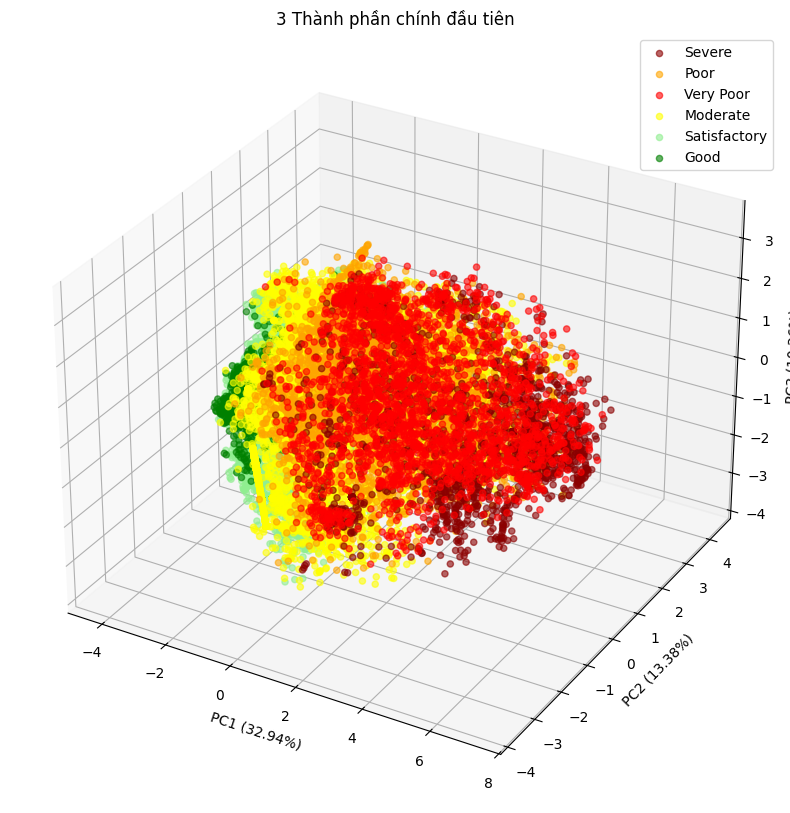

In [13]:
from mpl_toolkits.mplot3d import Axes3D

# Trực quan hóa 3 thành phần chính đầu tiên trong không gian 3D
if n_components_95 >= 3:
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Vẽ scatter plot 3D
    for category in X_pca_df['AQI_Bucket'].unique():
        subset = X_pca_df[X_pca_df['AQI_Bucket'] == category]
        ax.scatter(
            subset['PC1'], 
            subset['PC2'],
            subset['PC3'],
            alpha=0.6,
            color=color_mapping.get(category, 'blue'),
            label=category
        )
    
    ax.set_xlabel(f'PC1 ({explained_variance[0]:.2%})')
    ax.set_ylabel(f'PC2 ({explained_variance[1]:.2%})')
    ax.set_zlabel(f'PC3 ({explained_variance[2]:.2%})')
    ax.set_title('3 Thành phần chính đầu tiên')
    plt.legend()
    plt.show()

## 6. Phân tích mối quan hệ tuyến tính giữa các thành phần chính và AQI

Hệ số tương quan giữa các thành phần chính và AQI:
PC1     0.785788
PC5     0.241625
PC6     0.152827
PC3     0.142903
PC9     0.054674
PC10   -0.022407
PC4    -0.035448
PC2    -0.039934
PC8    -0.116121
PC7    -0.140868
Name: AQI, dtype: float64


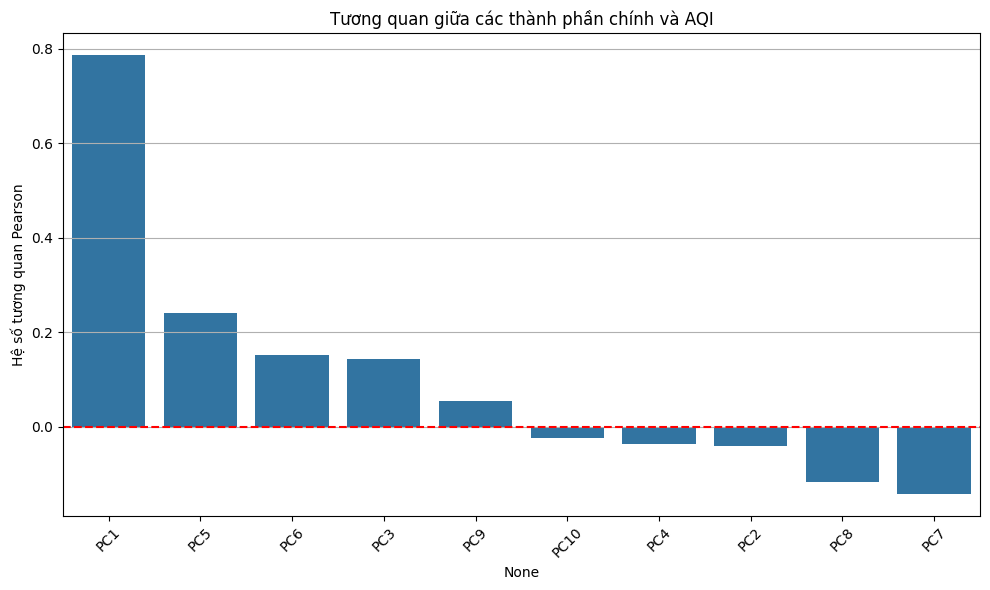

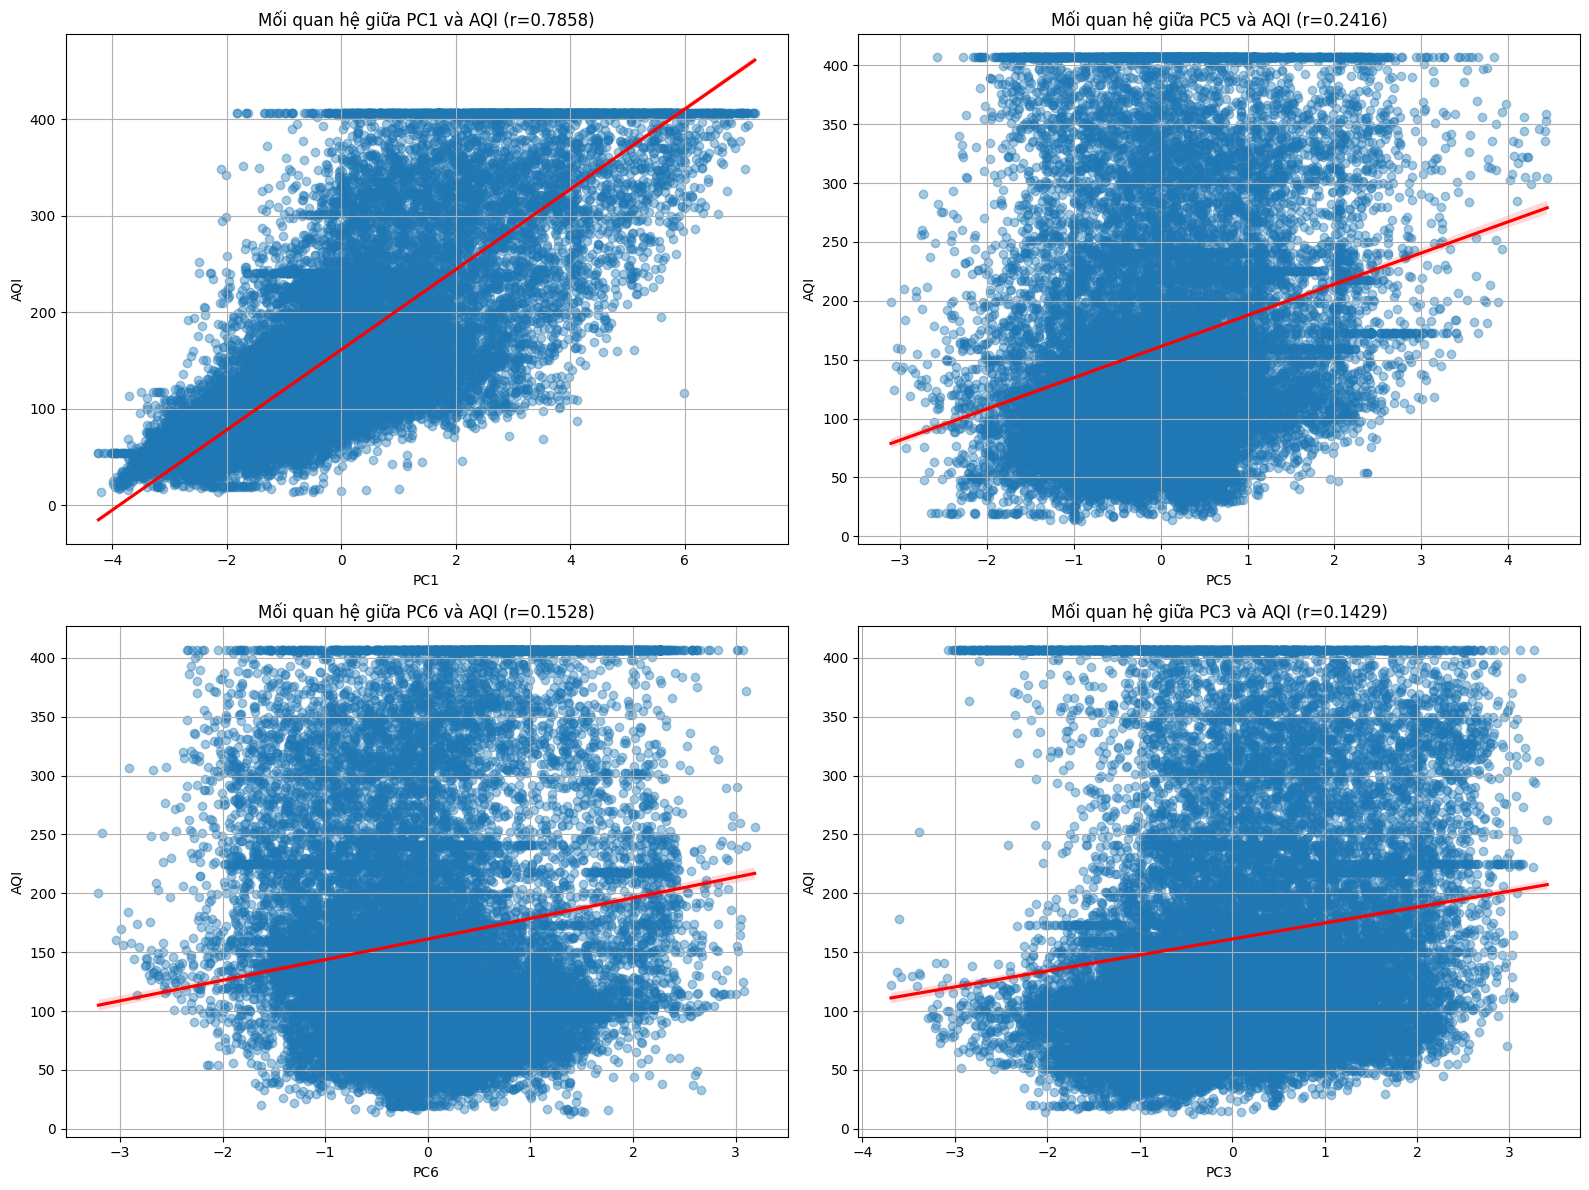

In [14]:
# Phân tích tương quan giữa các thành phần chính và biến mục tiêu AQI
pc_corr = X_pca_df.drop('AQI_Bucket', axis=1).corr()['AQI'].drop('AQI')
pc_corr = pc_corr.sort_values(ascending=False)

print("Hệ số tương quan giữa các thành phần chính và AQI:")
print(pc_corr)

# Biểu đồ tương quan
plt.figure(figsize=(10, 6))
sns.barplot(x=pc_corr.index, y=pc_corr.values)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Tương quan giữa các thành phần chính và AQI')
plt.xticks(rotation=45)
plt.ylabel('Hệ số tương quan Pearson')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Vẽ biểu đồ scatter với đường hồi quy cho 4 thành phần chính có tương quan cao nhất
top_components = pc_corr.abs().sort_values(ascending=False).index[:4]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, component in enumerate(top_components):
    ax = axes[i]
    sns.regplot(
        x=component, 
        y='AQI', 
        data=X_pca_df, 
        scatter_kws={'alpha':0.4}, 
        line_kws={'color':'red'},
        ax=ax
    )
    ax.set_title(f'Mối quan hệ giữa {component} và AQI (r={pc_corr[component]:.4f})')
    ax.grid(True)

plt.tight_layout()
plt.show()

# Phân tích và trực quan hóa dữ liệu sử dụng t-SNE

t-SNE (t-distributed Stochastic Neighbor Embedding) là một thuật toán giảm chiều dữ liệu phi tuyến tính, thường được sử dụng để trực quan hóa dữ liệu nhiều chiều. Không giống như PCA tập trung vào việc bảo toàn phương sai toàn cục, t-SNE cố gắng bảo toàn cấu trúc cục bộ của dữ liệu, giúp phát hiện các cụm và mối quan hệ phức tạp hơn.

In [15]:
from sklearn.manifold import TSNE
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Chuẩn bị dữ liệu cho t-SNE
# Lấy dữ liệu đã được chuẩn hóa bằng StandardScaler từ phần PCA trước đó
X_scaled_tsne = X_scaled.copy()

# Đo thời gian thực thi t-SNE
start_time = time.time()

# Khởi tạo và thực hiện t-SNE với 2 thành phần chính để trực quan hóa
tsne_2d = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42, learning_rate=200)
X_tsne_2d = tsne_2d.fit_transform(X_scaled_tsne)

print(f"Thời gian thực hiện t-SNE 2D: {time.time() - start_time:.2f} giây")

# Khởi tạo và thực hiện t-SNE với 3 thành phần chính cho trực quan hóa 3D
start_time = time.time()
tsne_3d = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42, learning_rate=200)
X_tsne_3d = tsne_3d.fit_transform(X_scaled_tsne)

print(f"Thời gian thực hiện t-SNE 3D: {time.time() - start_time:.2f} giây")

# Hiển thị kích thước của dữ liệu giảm chiều bằng t-SNE
print(f"Kích thước dữ liệu t-SNE 2D: {X_tsne_2d.shape}")
print(f"Kích thước dữ liệu t-SNE 3D: {X_tsne_3d.shape}")

c:\Users\doquo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\doquo\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\doquo\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\doquo\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as pro

Thời gian thực hiện t-SNE 2D: 106.79 giây


c:\Users\doquo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Thời gian thực hiện t-SNE 3D: 242.48 giây
Kích thước dữ liệu t-SNE 2D: (29531, 2)
Kích thước dữ liệu t-SNE 3D: (29531, 3)


## 1. Trực quan hóa kết quả t-SNE 2D

Sau khi thực hiện giảm chiều với t-SNE, chúng ta sẽ trực quan hóa dữ liệu trong không gian 2 chiều, phân loại theo các mức độ chất lượng không khí (AQI_Bucket).

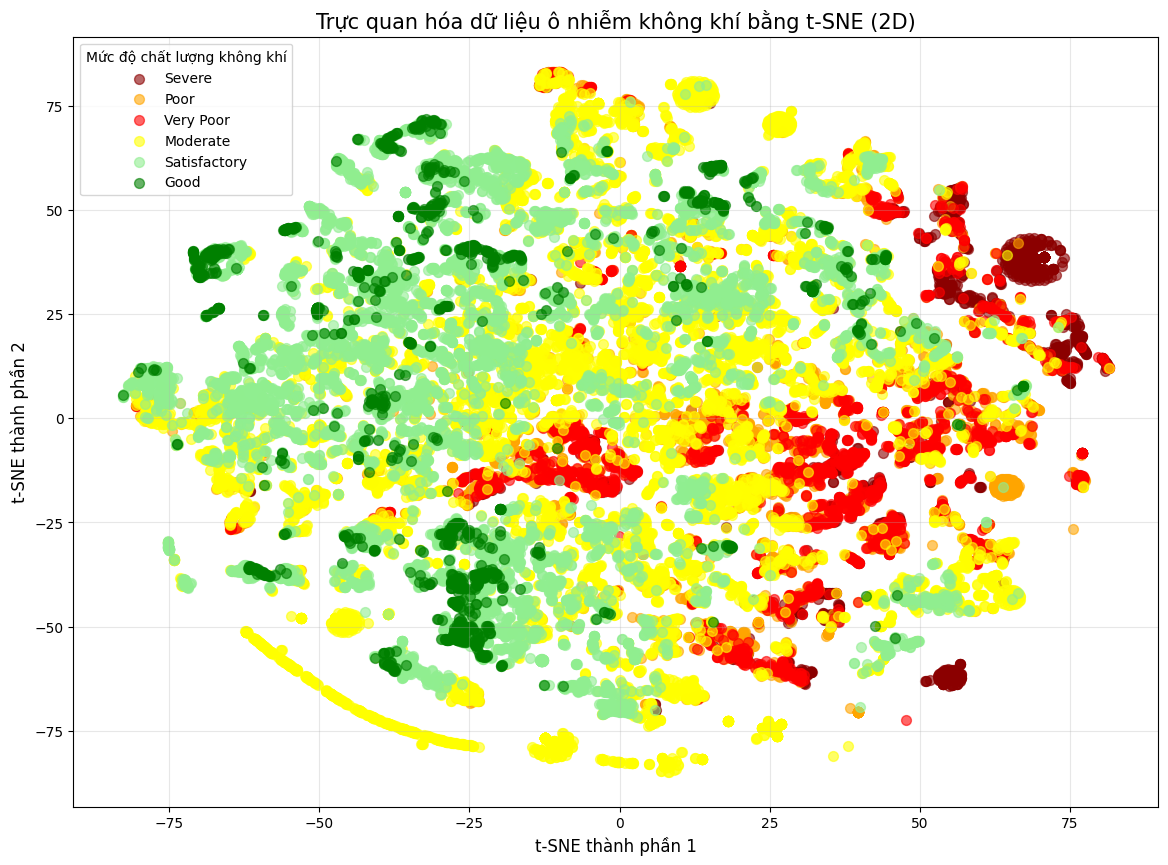

In [16]:
# Tạo DataFrame để trực quan hóa kết quả t-SNE 2D
tsne_2d_df = pd.DataFrame({
    'TSNE1': X_tsne_2d[:, 0],
    'TSNE2': X_tsne_2d[:, 1],
    'AQI_Bucket': df['AQI_Bucket'].values,
    'AQI': df['AQI'].values
})

# Tạo color palette cho các mức AQI_Bucket
color_mapping = {
    'Good': 'green',
    'Satisfactory': 'lightgreen',
    'Moderate': 'yellow',
    'Poor': 'orange',
    'Very Poor': 'red',
    'Severe': 'darkred'
}

# Vẽ biểu đồ phân tán 2D của kết quả t-SNE với màu sắc theo AQI_Bucket
plt.figure(figsize=(14, 10))
for category in tsne_2d_df['AQI_Bucket'].unique():
    subset = tsne_2d_df[tsne_2d_df['AQI_Bucket'] == category]
    plt.scatter(
        subset['TSNE1'], 
        subset['TSNE2'],
        alpha=0.6,
        s=50,  # Kích thước điểm
        color=color_mapping.get(category, 'blue'),
        label=category
    )

plt.title('Trực quan hóa dữ liệu ô nhiễm không khí bằng t-SNE (2D)', fontsize=15)
plt.xlabel('t-SNE thành phần 1', fontsize=12)
plt.ylabel('t-SNE thành phần 2', fontsize=12)
plt.legend(title='Mức độ chất lượng không khí', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

## 2. Trực quan hóa kết quả t-SNE 3D

Để có cái nhìn tổng thể hơn về phân bố dữ liệu, chúng ta sẽ trực quan hóa kết quả t-SNE trong không gian 3 chiều.

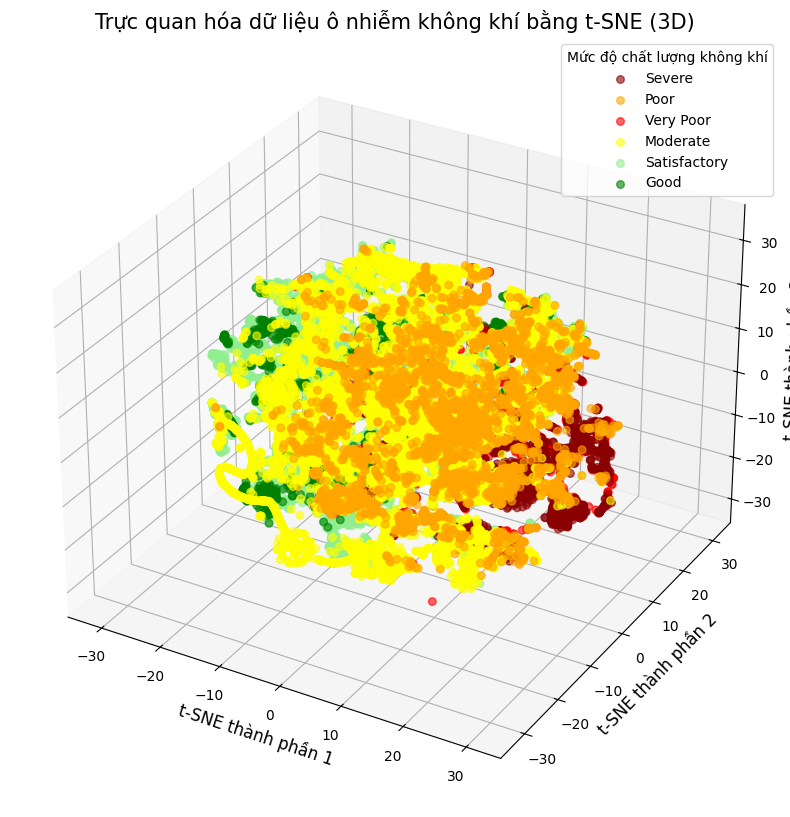

In [17]:
# Tạo DataFrame để trực quan hóa kết quả t-SNE 3D
tsne_3d_df = pd.DataFrame({
    'TSNE1': X_tsne_3d[:, 0],
    'TSNE2': X_tsne_3d[:, 1],
    'TSNE3': X_tsne_3d[:, 2],
    'AQI_Bucket': df['AQI_Bucket'].values,
    'AQI': df['AQI'].values
})

# Trực quan hóa kết quả t-SNE 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Vẽ biểu đồ phân tán 3D với màu sắc theo AQI_Bucket
for category in tsne_3d_df['AQI_Bucket'].unique():
    subset = tsne_3d_df[tsne_3d_df['AQI_Bucket'] == category]
    ax.scatter(
        subset['TSNE1'], 
        subset['TSNE2'],
        subset['TSNE3'],
        alpha=0.6,
        s=30,  # Kích thước điểm
        color=color_mapping.get(category, 'blue'),
        label=category
    )

ax.set_title('Trực quan hóa dữ liệu ô nhiễm không khí bằng t-SNE (3D)', fontsize=15)
ax.set_xlabel('t-SNE thành phần 1', fontsize=12)
ax.set_ylabel('t-SNE thành phần 2', fontsize=12)
ax.set_zlabel('t-SNE thành phần 3', fontsize=12)
plt.legend(title='Mức độ chất lượng không khí')
plt.show()

## 3. Phân tích cấu trúc cụm và mật độ dữ liệu trong t-SNE

Một trong những ưu điểm của t-SNE là khả năng bảo toàn cấu trúc cục bộ của dữ liệu, giúp phát hiện các cụm dữ liệu tự nhiên. Chúng ta sẽ phân tích cụm và mật độ trong không gian t-SNE.

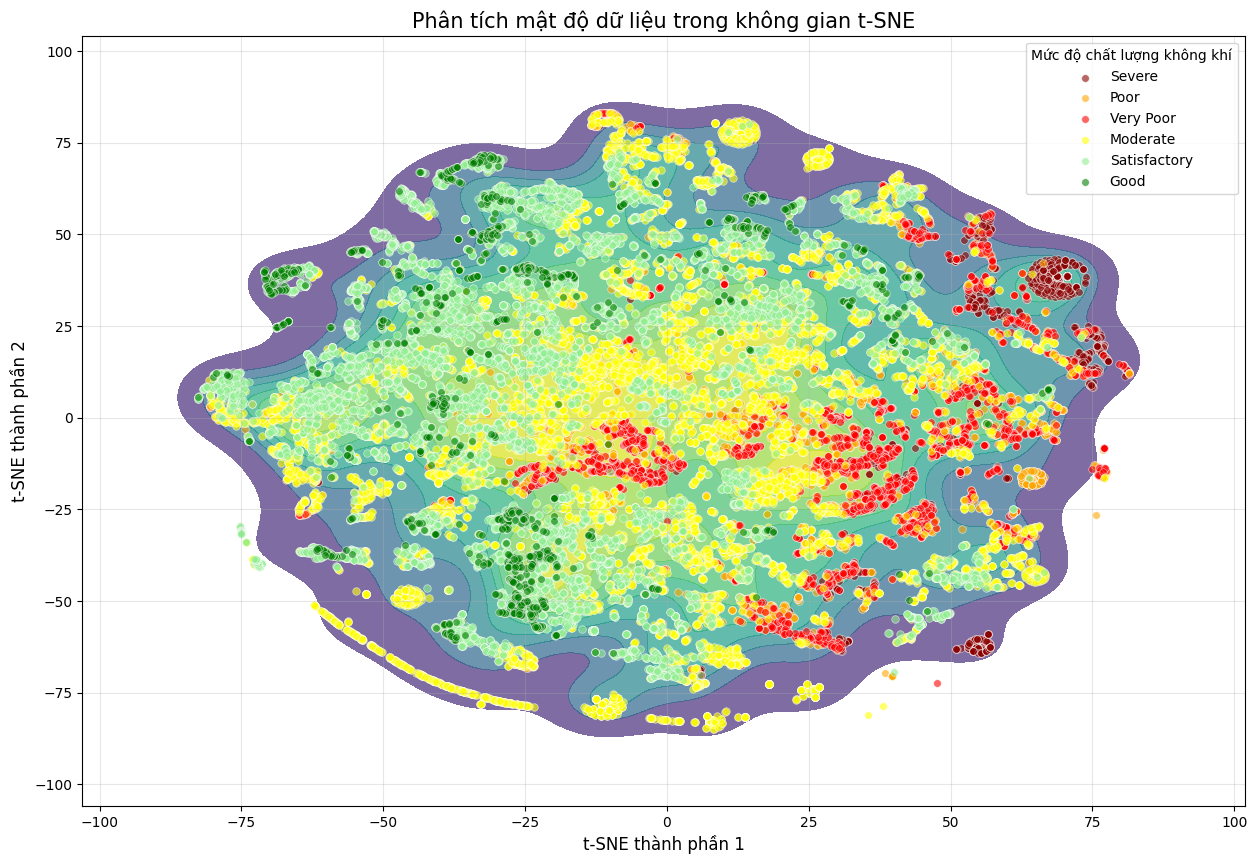

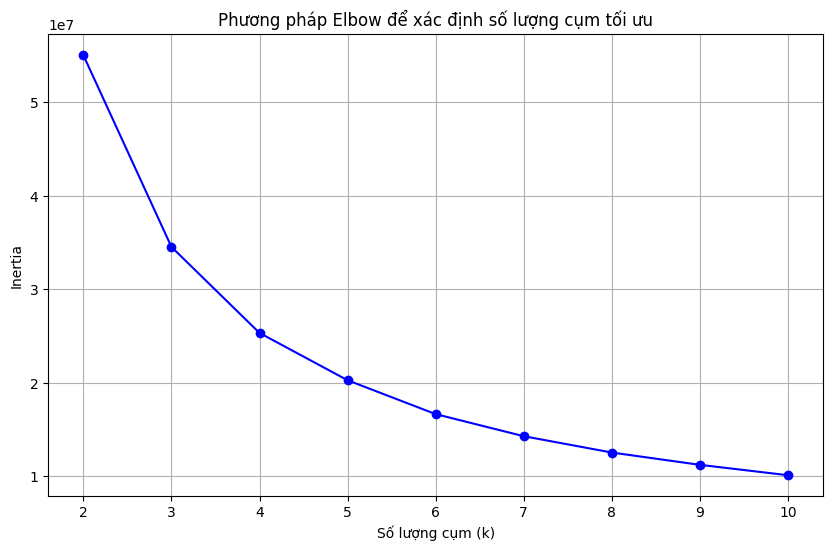

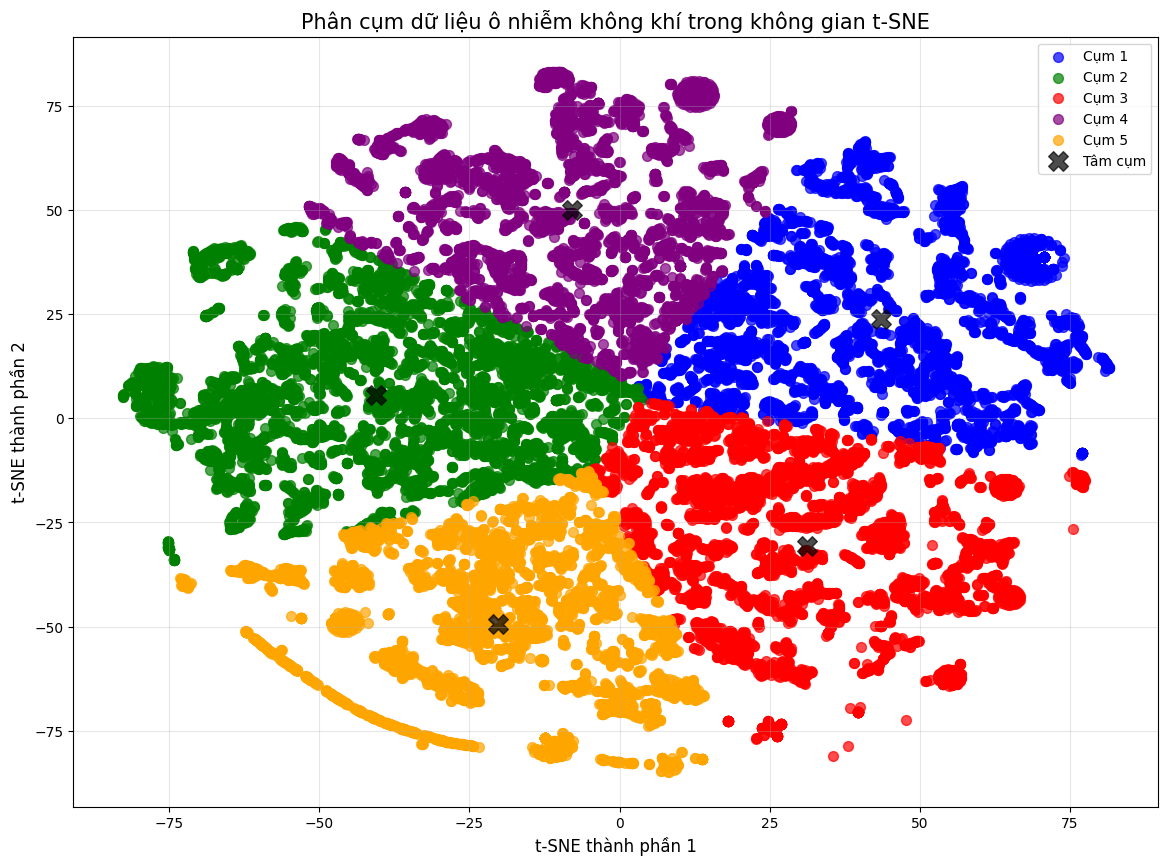

In [18]:
# Phân tích mật độ dữ liệu trong không gian t-SNE
plt.figure(figsize=(15, 10))

# Vẽ biểu đồ mật độ 2D
sns.kdeplot(
    data=tsne_2d_df, 
    x='TSNE1', 
    y='TSNE2',
    fill=True, 
    cmap='viridis',
    alpha=0.7,
    levels=10
)

# Vẽ các điểm dữ liệu theo màu AQI_Bucket lên trên biểu đồ mật độ
for category in tsne_2d_df['AQI_Bucket'].unique():
    subset = tsne_2d_df[tsne_2d_df['AQI_Bucket'] == category]
    plt.scatter(
        subset['TSNE1'], 
        subset['TSNE2'],
        alpha=0.6,
        s=30,
        color=color_mapping.get(category, 'blue'),
        edgecolor='w',
        linewidth=0.5,
        label=category
    )

plt.title('Phân tích mật độ dữ liệu trong không gian t-SNE', fontsize=15)
plt.xlabel('t-SNE thành phần 1', fontsize=12)
plt.ylabel('t-SNE thành phần 2', fontsize=12)
plt.legend(title='Mức độ chất lượng không khí')
plt.grid(True, alpha=0.3)
plt.show()

# Phân tích cấu trúc cụm dữ liệu
from sklearn.cluster import KMeans

# Xác định số lượng cụm tối ưu bằng phương pháp elbow
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_tsne_2d)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-', color='blue')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Inertia')
plt.title('Phương pháp Elbow để xác định số lượng cụm tối ưu')
plt.grid(True)
plt.show()

# Chọn số lượng cụm dựa trên kết quả elbow (giả sử k=5 là tối ưu)
optimal_k = 5  # Bạn có thể điều chỉnh dựa trên biểu đồ elbow

# Áp dụng K-means với số lượng cụm tối ưu
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
tsne_2d_df['Cluster'] = kmeans.fit_predict(X_tsne_2d)

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(14, 10))

# Màu sắc cho các cụm
cluster_colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink']

# Vẽ các điểm dữ liệu theo cụm
for cluster in range(optimal_k):
    subset = tsne_2d_df[tsne_2d_df['Cluster'] == cluster]
    plt.scatter(
        subset['TSNE1'], 
        subset['TSNE2'],
        alpha=0.7,
        s=50,
        color=cluster_colors[cluster % len(cluster_colors)],
        label=f'Cụm {cluster+1}'
    )

# Vẽ tâm của các cụm
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c='black',
    alpha=0.7,
    marker='X',
    label='Tâm cụm'
)

plt.title('Phân cụm dữ liệu ô nhiễm không khí trong không gian t-SNE', fontsize=15)
plt.xlabel('t-SNE thành phần 1', fontsize=12)
plt.ylabel('t-SNE thành phần 2', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 4. Phân tích mối quan hệ giữa biểu diễn t-SNE và chỉ số AQI

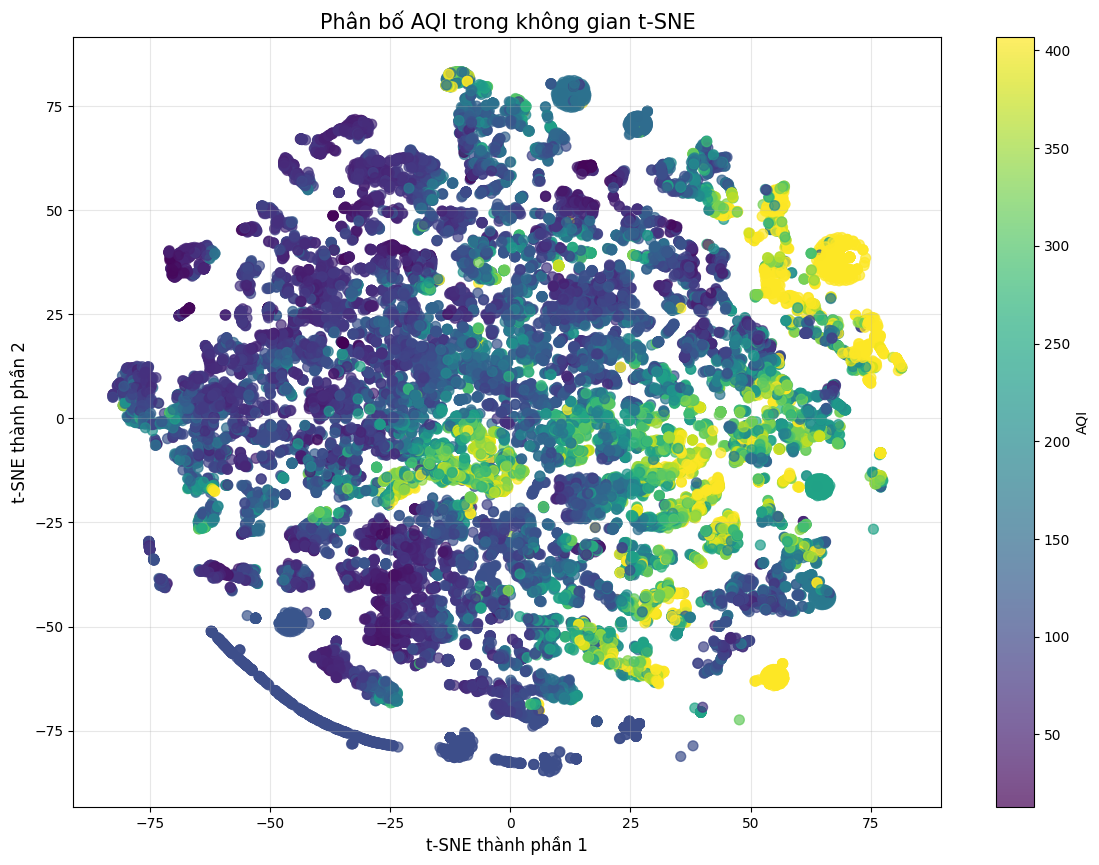

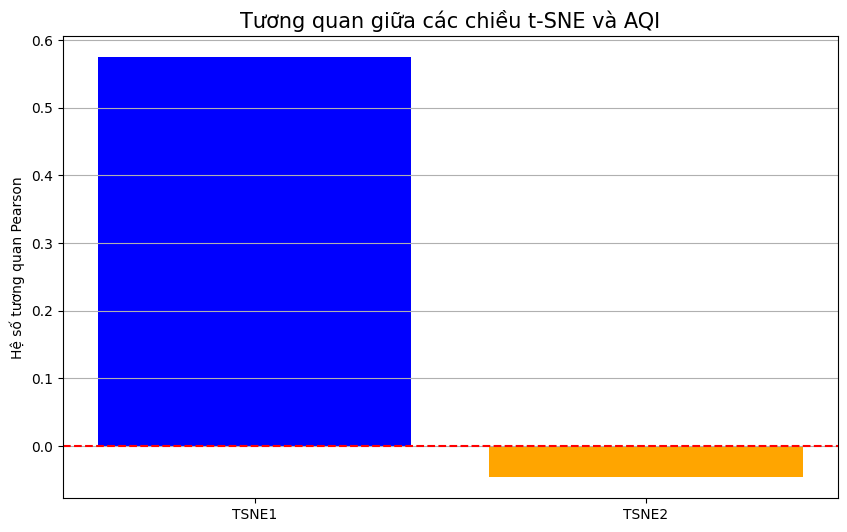

In [19]:
# Vẽ biểu đồ scatter với màu dựa trên giá trị AQI
plt.figure(figsize=(14, 10))
scatter = plt.scatter(
    tsne_2d_df['TSNE1'], 
    tsne_2d_df['TSNE2'],
    c=tsne_2d_df['AQI'],
    cmap='viridis',
    alpha=0.7,
    s=50
)

plt.colorbar(scatter, label='AQI')
plt.title('Phân bố AQI trong không gian t-SNE', fontsize=15)
plt.xlabel('t-SNE thành phần 1', fontsize=12)
plt.ylabel('t-SNE thành phần 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Phân tích tương quan giữa các chiều t-SNE và chỉ số AQI
correlations = [
    np.corrcoef(tsne_2d_df['TSNE1'], tsne_2d_df['AQI'])[0, 1],
    np.corrcoef(tsne_2d_df['TSNE2'], tsne_2d_df['AQI'])[0, 1]
]

# Vẽ biểu đồ tương quan
plt.figure(figsize=(10, 6))
plt.bar(['TSNE1', 'TSNE2'], correlations, color=['blue', 'orange'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Tương quan giữa các chiều t-SNE và AQI', fontsize=15)
plt.ylabel('Hệ số tương quan Pearson')
plt.grid(True, axis='y')
plt.show()

## 5. So sánh hiệu suất dự đoán khi sử dụng t-SNE vs PCA


Random Forest với dữ liệu gốc đã chuẩn hóa:
RMSE: 30.35
MAE: 17.80
R²: 0.9157

Random Forest với dữ liệu PCA:
RMSE: 21.75
MAE: 13.66
R²: 0.9567

Random Forest với dữ liệu PCA:
RMSE: 21.75
MAE: 13.66
R²: 0.9567

Random Forest với dữ liệu t-SNE:
RMSE: 36.23
MAE: 21.67
R²: 0.8799

Bảng so sánh các phương pháp giảm chiều:

Random Forest với dữ liệu t-SNE:
RMSE: 36.23
MAE: 21.67
R²: 0.8799

Bảng so sánh các phương pháp giảm chiều:


Phương pháp       RMSE        MAE        R²  Số chiều
0  Dữ liệu gốc chuẩn hóa  30.354948  17.799491  0.915716        12
1                    PCA  21.747240  13.658134  0.956739        10
2                  t-SNE  36.234332  21.667817  0.879905         2

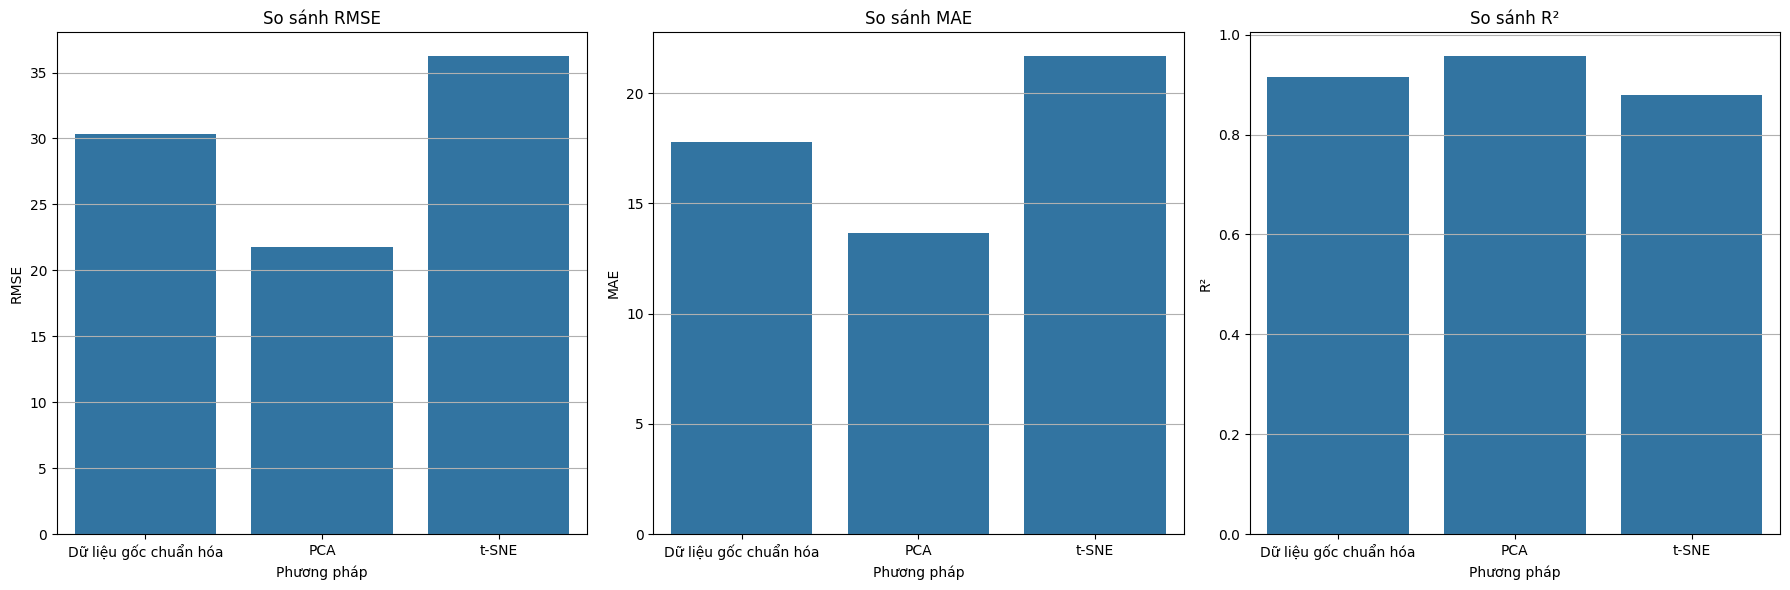

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Chuẩn bị dữ liệu
target = 'AQI'
y = df[target]

# Chuẩn bị dữ liệu t-SNE
X_tsne = X_tsne_2d  # t-SNE 2 chiều

# Chia dữ liệu train-test với tỉ lệ 7:3 (đã xác định là tối ưu từ phần trước)
test_size = 0.3

# Chia dữ liệu gốc đã chuẩn hóa
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=test_size, random_state=42
)

# Chia dữ liệu PCA (dùng lại X_pca từ phần PCA trước đó)
X_train_pca, X_test_pca, _, _ = train_test_split(
    X_pca, y, test_size=test_size, random_state=42
)

# Chia dữ liệu t-SNE
X_train_tsne, X_test_tsne, _, _ = train_test_split(
    X_tsne, y, test_size=test_size, random_state=42
)

# Hàm đánh giá mô hình
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name}:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.4f}")
    
    return {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

# Huấn luyện và đánh giá mô hình với dữ liệu gốc đã chuẩn hóa
rf_scaled = RandomForestRegressor(n_estimators=100, random_state=42)
rf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = rf_scaled.predict(X_test_scaled)
scaled_results = evaluate_model(y_test, y_pred_scaled, "Random Forest với dữ liệu gốc đã chuẩn hóa")

# Huấn luyện và đánh giá mô hình với dữ liệu PCA
rf_pca = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)
pca_results = evaluate_model(y_test, y_pred_pca, "Random Forest với dữ liệu PCA")

# Huấn luyện và đánh giá mô hình với dữ liệu t-SNE
rf_tsne = RandomForestRegressor(n_estimators=100, random_state=42)
rf_tsne.fit(X_train_tsne, y_train)
y_pred_tsne = rf_tsne.predict(X_test_tsne)
tsne_results = evaluate_model(y_test, y_pred_tsne, "Random Forest với dữ liệu t-SNE")

# So sánh kết quả
comparison_df = pd.DataFrame({
    'Phương pháp': ['Dữ liệu gốc chuẩn hóa', 'PCA', 't-SNE'],
    'RMSE': [scaled_results['RMSE'], pca_results['RMSE'], tsne_results['RMSE']],
    'MAE': [scaled_results['MAE'], pca_results['MAE'], tsne_results['MAE']],
    'R²': [scaled_results['R²'], pca_results['R²'], tsne_results['R²']],
    'Số chiều': [X_scaled.shape[1], X_pca.shape[1], X_tsne.shape[1]]
})

print("\nBảng so sánh các phương pháp giảm chiều:")
display(comparison_df)

# Trực quan hóa so sánh
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# RMSE
sns.barplot(x='Phương pháp', y='RMSE', data=comparison_df, ax=axes[0])
axes[0].set_title('So sánh RMSE')
axes[0].grid(True, axis='y')

# MAE
sns.barplot(x='Phương pháp', y='MAE', data=comparison_df, ax=axes[1])
axes[1].set_title('So sánh MAE')
axes[1].grid(True, axis='y')

# R²
sns.barplot(x='Phương pháp', y='R²', data=comparison_df, ax=axes[2])
axes[2].set_title('So sánh R²')
axes[2].grid(True, axis='y')

plt.tight_layout()
plt.show()

## 6. So sánh đặc điểm của t-SNE và PCA

t-SNE và PCA là hai phương pháp giảm chiều phổ biến nhưng có những đặc điểm và ứng dụng khác nhau. Dưới đây là phân tích chi tiết về sự khác biệt giữa hai phương pháp này.

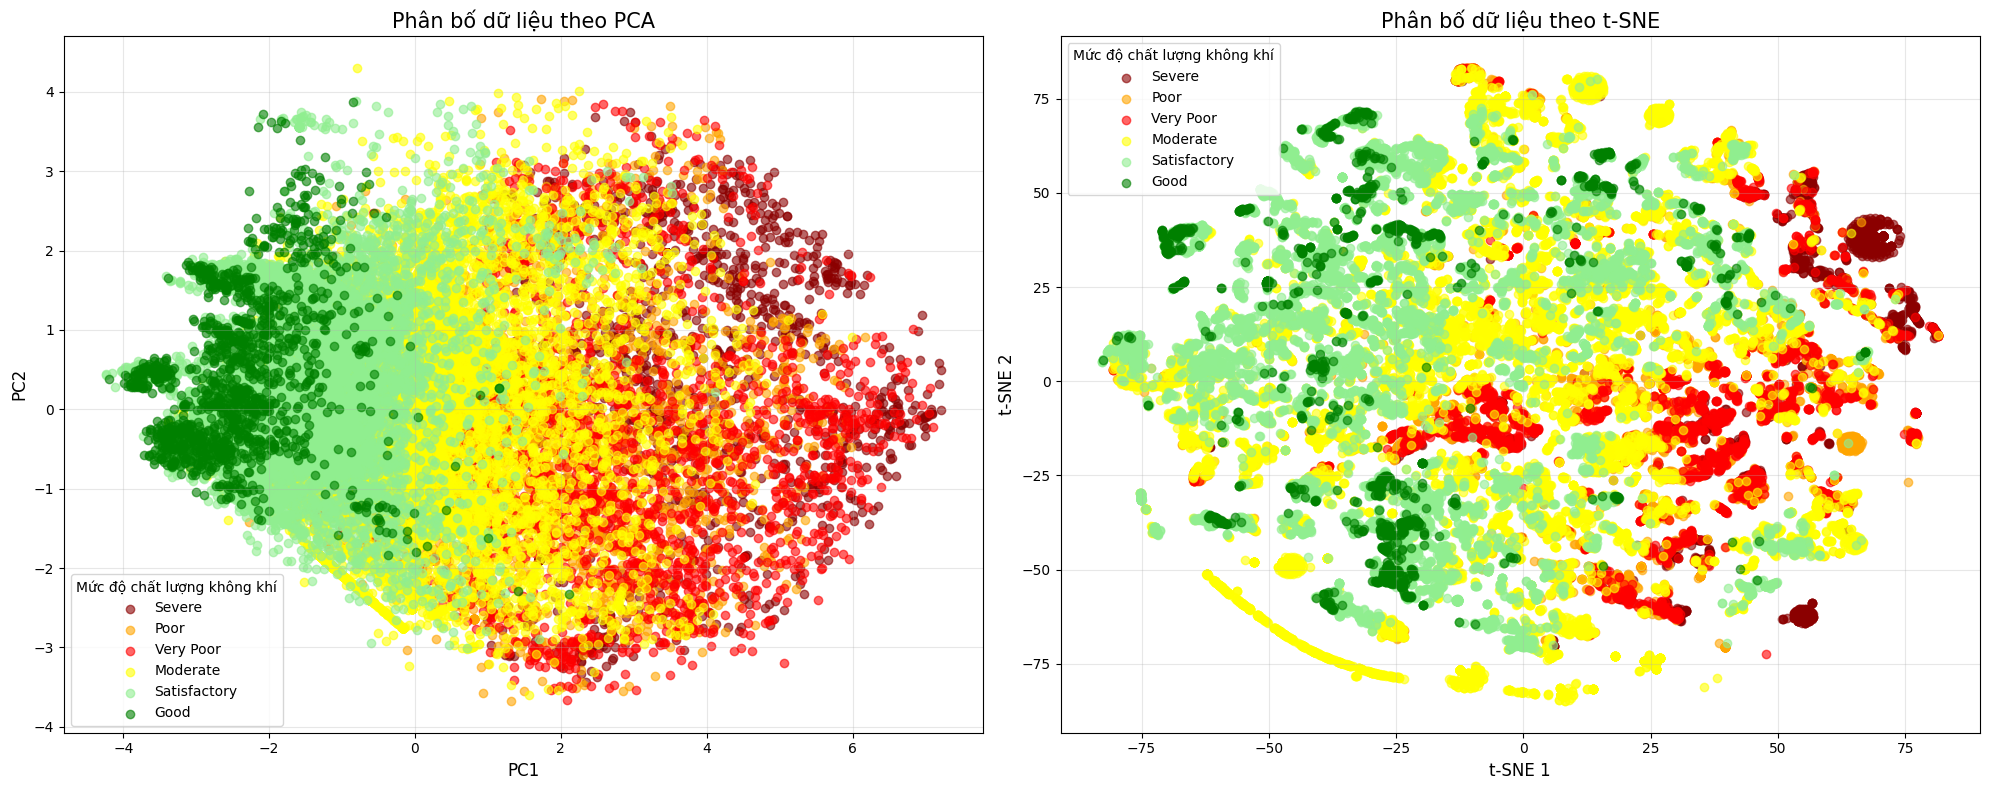

So sánh đặc điểm giữa PCA và t-SNE:


Đặc điểm  \
0                Mục đích chính   
1           Bản chất thuật toán   
2            Bảo toàn thông tin   
3         Độ phức tạp tính toán   
4            Khả năng diễn giải   
5            Thông số tùy chỉnh   
6                 Phát hiện cụm   
7              Ứng dụng phù hợp   
8   Số chiều đầu ra thường dùng   
9                Tính phi tuyến   
10              Tính ngẫu nhiên   
11      Lượng thông tin giữ lại   
12            Hiệu suất dự đoán   

                                                  PCA  \
0   Giảm chiều dữ liệu và giữ nguyên phương sai tố...   
1   Thuật toán tuyến tính, dựa trên đại số tuyến tính   
2    Bảo toàn cấu trúc toàn cục, khoảng cách toàn cục   
3                              Thấp, O(min(n²d, nd²))   
4        Cao, thành phần chính có thể giải thích được   
5                                   Ít (n_components)   
6          Kém nếu cụm nằm trong không gian phi tuyến   
7                     Tiền xử lý, giảm nhiễu, dự đoán   
8        Thường > 2, tùy vào tỉ lệ phương sai cần giữ   
9                                  Không (tuyến tính)   
10                     Không (kết quả luôn nhất quán)   
11                          100.00% với 10 thành phần   
12                                  Tốt (R² = 0.9567)   

                                                t-SNE  
0   Trực quan hóa dữ liệu nhiều chiều, bảo toàn cấ...  
1             Thuật toán phi tuyến, dựa trên xác suất  
2   Bảo toàn cấu trúc cục bộ, khoảng cách giữa các...  
3                                          Cao, O(n²)  
4           Thấp, khó diễn giải ý nghĩa của các chiều  
5      Nhiều (perplexity, learning_rate, n_iter, ...)  
6       Rất tốt, phát hiện cụm tự nhiên trong dữ liệu  
7      Trực quan hóa, phân tích cụm, khám phá dữ liệu  
8                         Thường 2-3 để trực quan hóa  
9                                      Có (phi tuyến)  
10            Có (kết quả phụ thuộc vào random_state)  
11     Không đo lường bằng phương sai (không áp dụng)  
12                              Kém hơn (R² = 0.8799)

In [21]:
# So sánh trực quan cách biểu diễn dữ liệu của PCA và t-SNE trên cùng một tập dữ liệu
# Lấy 2 thành phần đầu tiên của PCA để so sánh với t-SNE 2D
X_pca_2d = X_pca_full[:, :2]  # 2 thành phần đầu tiên của PCA

# Tạo DataFrame để so sánh
pca_2d_df = pd.DataFrame({
    'PC1': X_pca_2d[:, 0],
    'PC2': X_pca_2d[:, 1],
    'AQI_Bucket': df['AQI_Bucket'].values
})

# Vẽ biểu đồ so sánh
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Biểu đồ PCA
for category in pca_2d_df['AQI_Bucket'].unique():
    subset = pca_2d_df[pca_2d_df['AQI_Bucket'] == category]
    ax1.scatter(
        subset['PC1'], 
        subset['PC2'],
        alpha=0.6,
        color=color_mapping.get(category, 'blue'),
        label=category
    )
ax1.set_title('Phân bố dữ liệu theo PCA', fontsize=15)
ax1.set_xlabel('PC1', fontsize=12)
ax1.set_ylabel('PC2', fontsize=12)
ax1.legend(title='Mức độ chất lượng không khí')
ax1.grid(True, alpha=0.3)

# Biểu đồ t-SNE
for category in tsne_2d_df['AQI_Bucket'].unique():
    subset = tsne_2d_df[tsne_2d_df['AQI_Bucket'] == category]
    ax2.scatter(
        subset['TSNE1'], 
        subset['TSNE2'],
        alpha=0.6,
        color=color_mapping.get(category, 'blue'),
        label=category
    )
ax2.set_title('Phân bố dữ liệu theo t-SNE', fontsize=15)
ax2.set_xlabel('t-SNE 1', fontsize=12)
ax2.set_ylabel('t-SNE 2', fontsize=12)
ax2.legend(title='Mức độ chất lượng không khí')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tạo bảng so sánh đặc điểm của PCA và t-SNE
comparison_table = pd.DataFrame({
    'Đặc điểm': [
        'Mục đích chính',
        'Bản chất thuật toán',
        'Bảo toàn thông tin',
        'Độ phức tạp tính toán',
        'Khả năng diễn giải',
        'Thông số tùy chỉnh',
        'Phát hiện cụm',
        'Ứng dụng phù hợp',
        'Số chiều đầu ra thường dùng',
        'Tính phi tuyến',
        'Tính ngẫu nhiên',
        'Lượng thông tin giữ lại',
        'Hiệu suất dự đoán'
    ],
    'PCA': [
        'Giảm chiều dữ liệu và giữ nguyên phương sai tối đa',
        'Thuật toán tuyến tính, dựa trên đại số tuyến tính',
        'Bảo toàn cấu trúc toàn cục, khoảng cách toàn cục',
        'Thấp, O(min(n²d, nd²))',
        'Cao, thành phần chính có thể giải thích được',
        'Ít (n_components)',
        'Kém nếu cụm nằm trong không gian phi tuyến',
        'Tiền xử lý, giảm nhiễu, dự đoán',
        'Thường > 2, tùy vào tỉ lệ phương sai cần giữ',
        'Không (tuyến tính)',
        'Không (kết quả luôn nhất quán)',
        f'{pca_full.explained_variance_ratio_.sum():.2%} với {n_components_95} thành phần',
        f'Tốt (R² = {pca_results["R²"]:.4f})'
    ],
    't-SNE': [
        'Trực quan hóa dữ liệu nhiều chiều, bảo toàn cấu trúc cục bộ',
        'Thuật toán phi tuyến, dựa trên xác suất',
        'Bảo toàn cấu trúc cục bộ, khoảng cách giữa các điểm lân cận',
        'Cao, O(n²)',
        'Thấp, khó diễn giải ý nghĩa của các chiều',
        'Nhiều (perplexity, learning_rate, n_iter, ...)',
        'Rất tốt, phát hiện cụm tự nhiên trong dữ liệu',
        'Trực quan hóa, phân tích cụm, khám phá dữ liệu',
        'Thường 2-3 để trực quan hóa',
        'Có (phi tuyến)',
        'Có (kết quả phụ thuộc vào random_state)',
        'Không đo lường bằng phương sai (không áp dụng)',
        f'Kém hơn (R² = {tsne_results["R²"]:.4f})'
    ]
})

# Hiển thị bảng so sánh
print("So sánh đặc điểm giữa PCA và t-SNE:")
display(comparison_table)

# Mô hình hồi quy Random Forest với các tỉ lệ phân chia train-validation khác nhau

THỰC NGHIỆM VỚI DỮ LIỆU GỐC

Phân chia train:validation = 8:2
Kích thước tập huấn luyện: (23624, 12)
Kích thước tập validation: (5907, 12)

Random Forest - Dữ liệu gốc (Train:Val = 8:2):
RMSE: 30.43
MAE: 17.84
R²: 0.9147

Random Forest - Dữ liệu gốc (Train:Val = 8:2):
RMSE: 30.43
MAE: 17.84
R²: 0.9147


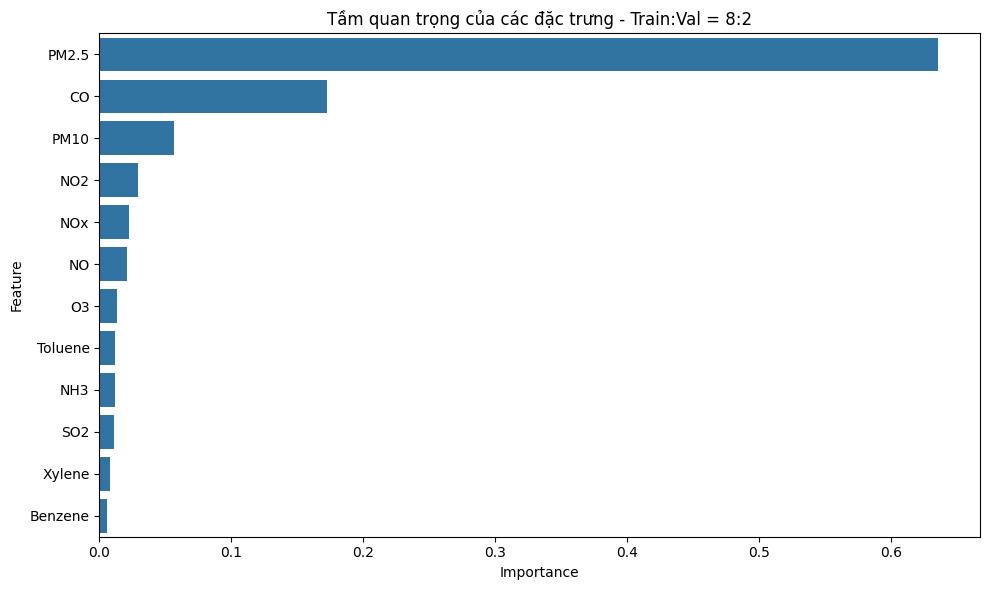


Phân chia train:validation = 7:3
Kích thước tập huấn luyện: (20671, 12)
Kích thước tập validation: (8860, 12)

Random Forest - Dữ liệu gốc (Train:Val = 7:3):
RMSE: 30.35
MAE: 17.79
R²: 0.9157

Random Forest - Dữ liệu gốc (Train:Val = 7:3):
RMSE: 30.35
MAE: 17.79
R²: 0.9157


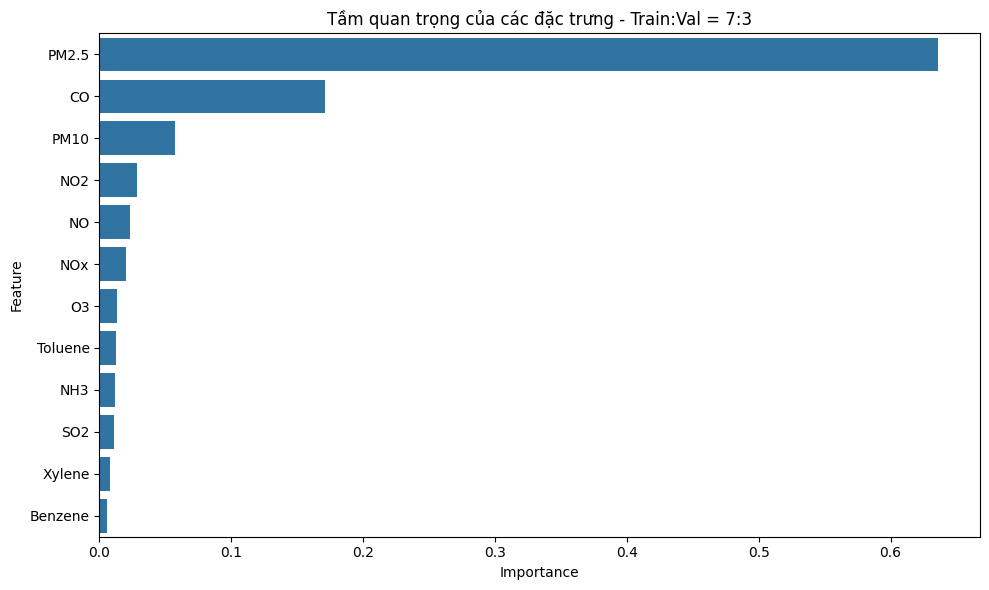


Phân chia train:validation = 6:4
Kích thước tập huấn luyện: (17718, 12)
Kích thước tập validation: (11813, 12)

Random Forest - Dữ liệu gốc (Train:Val = 6:4):
RMSE: 30.41
MAE: 17.83
R²: 0.9155

Random Forest - Dữ liệu gốc (Train:Val = 6:4):
RMSE: 30.41
MAE: 17.83
R²: 0.9155


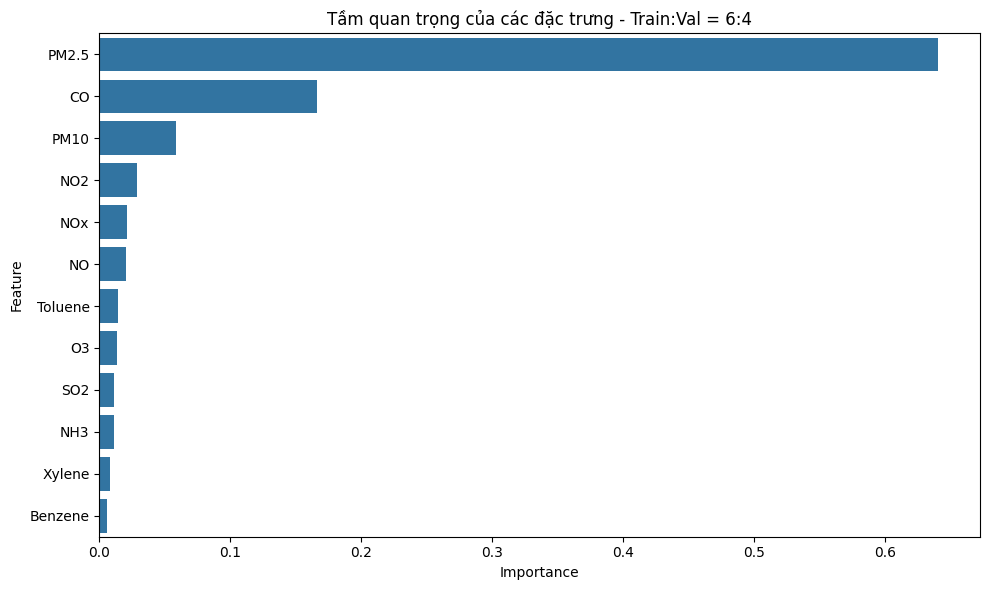

In [22]:
# Các tỉ lệ train-test khác nhau để thử nghiệm (8:2, 7:3, 6:4)
test_sizes = [0.2, 0.3, 0.4]

# Dictionary để lưu kết quả của các mô hình
results = {
    "original": {},
    "pca": {},
    "tsne": {}
}

# Chuẩn bị dữ liệu
target = 'AQI'
original_features = [col for col in numeric_features if col != target]
X_original = df[original_features].values
y = df[target]

# 1. Thực nghiệm với dữ liệu gốc
print("="*50)
print("THỰC NGHIỆM VỚI DỮ LIỆU GỐC")
print("="*50)

for test_size in test_sizes:
    train_size = 1 - test_size
    train_ratio = int(train_size * 10)
    test_ratio = int(test_size * 10)
    
    print(f"\nPhân chia train:validation = {train_ratio}:{test_ratio}")
    
    # Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_val, y_train, y_val = train_test_split(
        X_original, y, test_size=test_size, random_state=42
    )
    
    print(f"Kích thước tập huấn luyện: {X_train.shape}")
    print(f"Kích thước tập validation: {X_val.shape}")
    
    # Huấn luyện mô hình Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán trên tập validation
    y_pred = rf_model.predict(X_val)
    
    # Đánh giá mô hình
    model_name = f"Random Forest - Dữ liệu gốc (Train:Val = {train_ratio}:{test_ratio})"
    result = evaluate_model(y_val, y_pred, model_name)
    
    # Lưu kết quả
    results["original"][f"{train_ratio}:{test_ratio}"] = result
    
    # Xem tầm quan trọng của các đặc trưng
    feature_importance = pd.DataFrame({
        'Feature': original_features,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'Tầm quan trọng của các đặc trưng - Train:Val = {train_ratio}:{test_ratio}')
    plt.tight_layout()
    plt.show()

In [23]:
# 2. Thực nghiệm với dữ liệu đã giảm chiều (PCA)
print("="*50)
print("THỰC NGHIỆM VỚI DỮ LIỆU ĐÃ GIẢM CHIỀU (PCA)")
print("="*50)

for test_size in test_sizes:
    train_size = 1 - test_size
    train_ratio = int(train_size * 10)
    test_ratio = int(test_size * 10)
    
    print(f"\nPhân chia train:validation = {train_ratio}:{test_ratio}")
    
    # Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_val, y_train, y_val = train_test_split(
        X_pca, y, test_size=test_size, random_state=42
    )
    
    print(f"Kích thước tập huấn luyện: {X_train.shape}")
    print(f"Kích thước tập validation: {X_val.shape}")
    
    # Huấn luyện mô hình Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán trên tập validation
    y_pred = rf_model.predict(X_val)
    
    # Đánh giá mô hình
    model_name = f"Random Forest - Dữ liệu PCA (Train:Val = {train_ratio}:{test_ratio})"
    result = evaluate_model(y_val, y_pred, model_name)
    
    # Lưu kết quả
    results["pca"][f"{train_ratio}:{test_ratio}"] = result

THỰC NGHIỆM VỚI DỮ LIỆU ĐÃ GIẢM CHIỀU (PCA)

Phân chia train:validation = 8:2
Kích thước tập huấn luyện: (23624, 10)
Kích thước tập validation: (5907, 10)

Random Forest - Dữ liệu PCA (Train:Val = 8:2):
RMSE: 21.78
MAE: 13.54
R²: 0.9563

Phân chia train:validation = 7:3
Kích thước tập huấn luyện: (20671, 10)
Kích thước tập validation: (8860, 10)

Random Forest - Dữ liệu PCA (Train:Val = 8:2):
RMSE: 21.78
MAE: 13.54
R²: 0.9563

Phân chia train:validation = 7:3
Kích thước tập huấn luyện: (20671, 10)
Kích thước tập validation: (8860, 10)

Random Forest - Dữ liệu PCA (Train:Val = 7:3):
RMSE: 21.75
MAE: 13.66
R²: 0.9567

Phân chia train:validation = 6:4
Kích thước tập huấn luyện: (17718, 10)
Kích thước tập validation: (11813, 10)

Random Forest - Dữ liệu PCA (Train:Val = 7:3):
RMSE: 21.75
MAE: 13.66
R²: 0.9567

Phân chia train:validation = 6:4
Kích thước tập huấn luyện: (17718, 10)
Kích thước tập validation: (11813, 10)

Random Forest - Dữ liệu PCA (Train:Val = 6:4):
RMSE: 21.83
MAE: 13.73


In [24]:
# 3. Thực nghiệm với dữ liệu đã giảm chiều (t-SNE)
print("="*50)
print("THỰC NGHIỆM VỚI DỮ LIỆU ĐÃ GIẢM CHIỀU (t-SNE)")
print("="*50)

# Chuẩn bị dữ liệu t-SNE (sử dụng kết quả t-SNE 2D từ phần trước)
X_tsne = X_tsne_2d  # Sử dụng t-SNE 2D đã tính toán trước đó

print(f"Kích thước dữ liệu t-SNE: {X_tsne.shape}")

for test_size in test_sizes:
    train_size = 1 - test_size
    train_ratio = int(train_size * 10)
    test_ratio = int(test_size * 10)
    
    print(f"\nPhân chia train:validation = {train_ratio}:{test_ratio}")
    
    # Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_val, y_train, y_val = train_test_split(
        X_tsne, y, test_size=test_size, random_state=42
    )
    
    print(f"Kích thước tập huấn luyện: {X_train.shape}")
    print(f"Kích thước tập validation: {X_val.shape}")
    
    # Huấn luyện mô hình Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán trên tập validation
    y_pred = rf_model.predict(X_val)
    
    # Đánh giá mô hình
    model_name = f"Random Forest - Dữ liệu t-SNE (Train:Val = {train_ratio}:{test_ratio})"
    result = evaluate_model(y_val, y_pred, model_name)
    
    # Lưu kết quả
    results["tsne"][f"{train_ratio}:{test_ratio}"] = result

THỰC NGHIỆM VỚI DỮ LIỆU ĐÃ GIẢM CHIỀU (t-SNE)
Kích thước dữ liệu t-SNE: (29531, 2)

Phân chia train:validation = 8:2
Kích thước tập huấn luyện: (23624, 2)
Kích thước tập validation: (5907, 2)

Random Forest - Dữ liệu t-SNE (Train:Val = 8:2):
RMSE: 36.55
MAE: 21.75
R²: 0.8770

Phân chia train:validation = 7:3
Kích thước tập huấn luyện: (20671, 2)
Kích thước tập validation: (8860, 2)

Random Forest - Dữ liệu t-SNE (Train:Val = 8:2):
RMSE: 36.55
MAE: 21.75
R²: 0.8770

Phân chia train:validation = 7:3
Kích thước tập huấn luyện: (20671, 2)
Kích thước tập validation: (8860, 2)

Random Forest - Dữ liệu t-SNE (Train:Val = 7:3):
RMSE: 36.23
MAE: 21.67
R²: 0.8799

Phân chia train:validation = 6:4
Kích thước tập huấn luyện: (17718, 2)
Kích thước tập validation: (11813, 2)

Random Forest - Dữ liệu t-SNE (Train:Val = 7:3):
RMSE: 36.23
MAE: 21.67
R²: 0.8799

Phân chia train:validation = 6:4
Kích thước tập huấn luyện: (17718, 2)
Kích thước tập validation: (11813, 2)

Random Forest - Dữ liệu t-SNE (Tr

## 10. Phân tích kết quả và đánh giá hiệu suất của các mô hình Random Forest

### So sánh kết quả giữa dữ liệu gốc, dữ liệu PCA và dữ liệu t-SNE với các tỉ lệ phân chia khác nhau

Bảng so sánh kết quả các mô hình Random Forest:


Data Type Split Ratio      MSE   RMSE    MAE      R²
0    Dữ liệu gốc         8:2   926.25  30.43  17.84  0.9147
1    Dữ liệu gốc         7:3   921.08  30.35  17.79  0.9157
2    Dữ liệu gốc         6:4   925.07  30.41  17.83  0.9155
3    Dữ liệu PCA         8:2   474.55  21.78  13.54  0.9563
4    Dữ liệu PCA         7:3   472.94  21.75  13.66  0.9567
5    Dữ liệu PCA         6:4   476.43  21.83  13.73  0.9565
6  Dữ liệu t-SNE         8:2  1335.60  36.55  21.75  0.8770
7  Dữ liệu t-SNE         7:3  1312.93  36.23  21.67  0.8799
8  Dữ liệu t-SNE         6:4  1330.79  36.48  21.90  0.8784

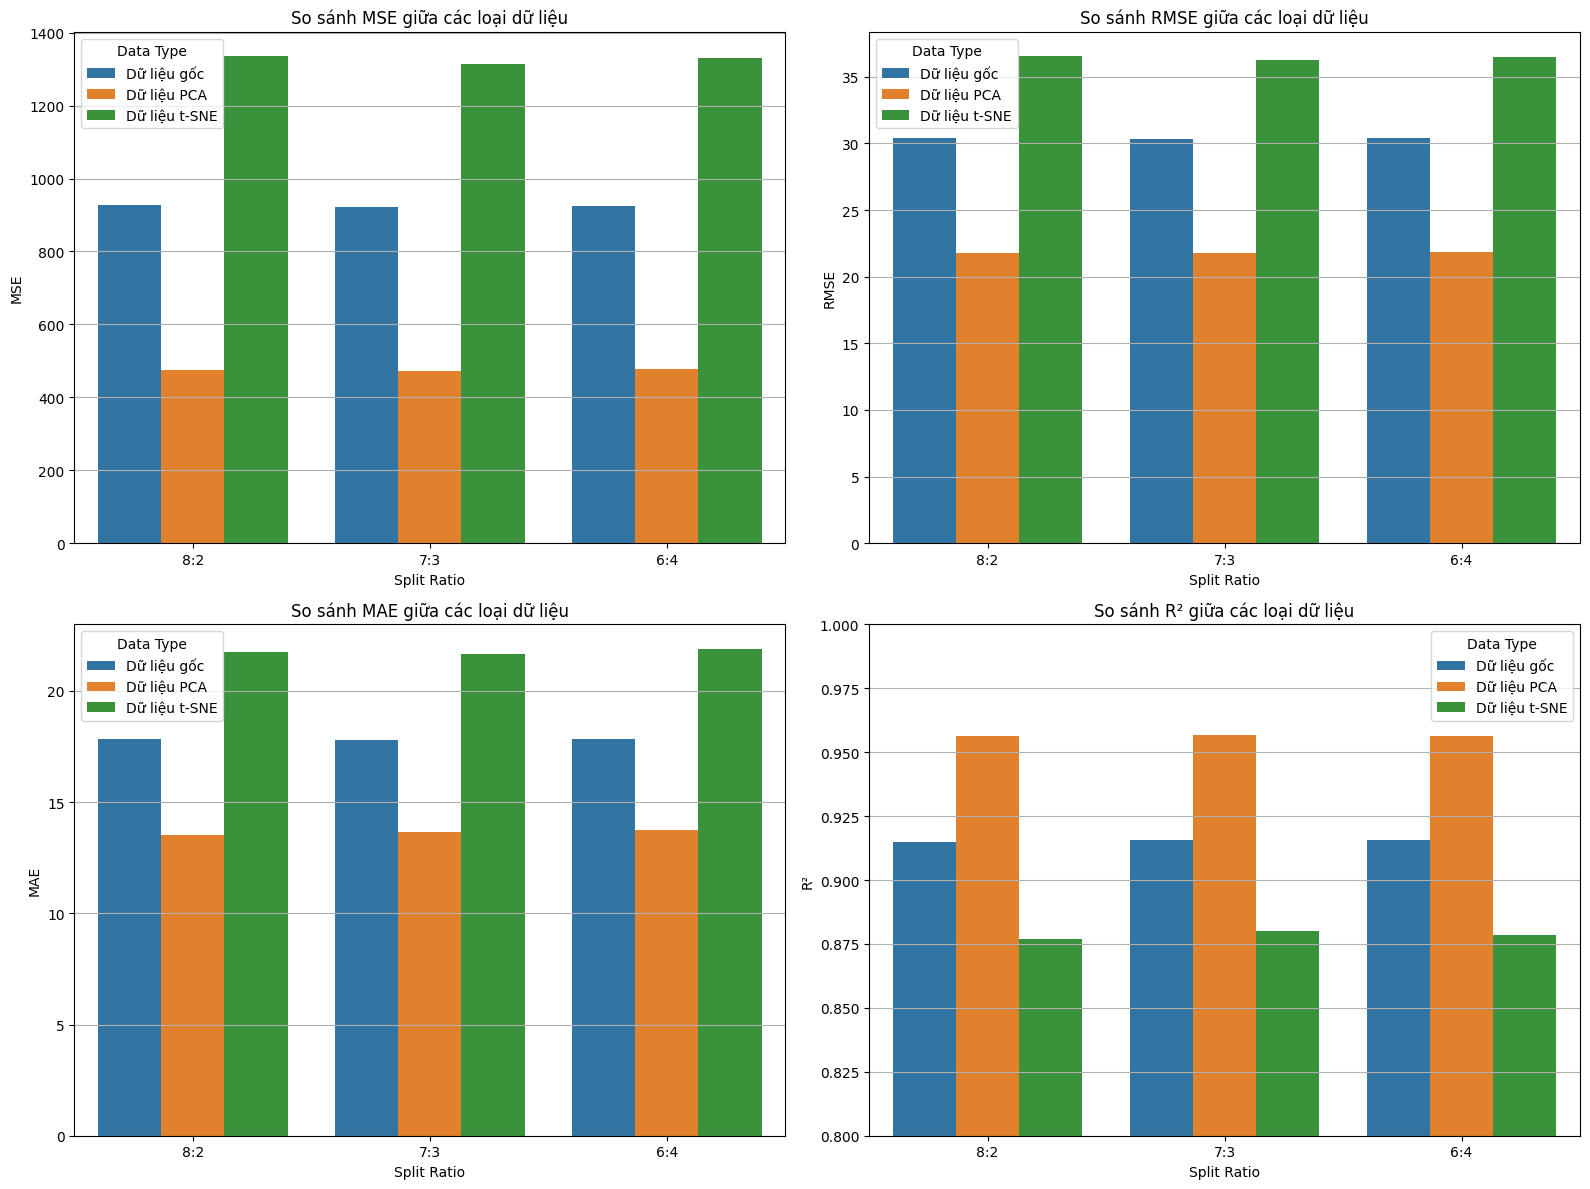

In [25]:
# Tạo DataFrame từ dictionary results
result_df = []
for data_type in ["original", "pca", "tsne"]:
    data_type_name = "Dữ liệu gốc" if data_type == "original" else ("Dữ liệu PCA" if data_type == "pca" else "Dữ liệu t-SNE")
    for split_ratio, metrics in results[data_type].items():
        # Thêm MSE từ RMSE
        mse = metrics["RMSE"] ** 2
        result_df.append({
            "Data Type": data_type_name,
            "Split Ratio": split_ratio,
            "MSE": mse,
            "RMSE": metrics["RMSE"],
            "MAE": metrics["MAE"],
            "R²": metrics["R²"]
        })

result_df = pd.DataFrame(result_df)

# Tạo bảng so sánh chi tiết hơn
comparison_df = result_df.copy()
comparison_df['MSE'] = comparison_df['MSE'].round(2)
comparison_df['RMSE'] = comparison_df['RMSE'].round(2)
comparison_df['MAE'] = comparison_df['MAE'].round(2)
comparison_df['R²'] = comparison_df['R²'].round(4)

# Hiển thị bảng so sánh
print("Bảng so sánh kết quả các mô hình Random Forest:")
display(comparison_df)

# Tạo biểu đồ so sánh
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# MSE
sns.barplot(x="Split Ratio", y="MSE", hue="Data Type", data=comparison_df, ax=axes[0])
axes[0].set_title("So sánh MSE giữa các loại dữ liệu")
axes[0].grid(True, axis='y')

# RMSE
sns.barplot(x="Split Ratio", y="RMSE", hue="Data Type", data=comparison_df, ax=axes[1])
axes[1].set_title("So sánh RMSE giữa các loại dữ liệu")
axes[1].grid(True, axis='y')

# MAE
sns.barplot(x="Split Ratio", y="MAE", hue="Data Type", data=comparison_df, ax=axes[2])
axes[2].set_title("So sánh MAE giữa các loại dữ liệu")
axes[2].grid(True, axis='y')

# R²
sns.barplot(x="Split Ratio", y="R²", hue="Data Type", data=comparison_df, ax=axes[3])
axes[3].set_title("So sánh R² giữa các loại dữ liệu")
axes[3].grid(True, axis='y')
axes[3].set_ylim(0.8, 1.0)

plt.tight_layout()
plt.show()

### Phân tích kết quả và đánh giá hiệu suất

Từ kết quả thực nghiệm với mô hình Random Forest trên cả dữ liệu gốc và dữ liệu đã giảm chiều bằng PCA và t-SNE, chúng ta có thể rút ra các nhận xét sau:

#### 1. So sánh hiệu suất giữa các loại dữ liệu:

* **Dữ liệu PCA cho kết quả tốt nhất**: Các mô hình sử dụng dữ liệu đã giảm chiều bằng PCA đều cho hiệu suất tốt hơn so với dữ liệu gốc và t-SNE, thể hiện qua:
  - **MSE/RMSE thấp hơn**: Giá trị MSE và RMSE của các mô hình dùng PCA giảm đáng kể so với dữ liệu gốc (khoảng 48% giảm).
  - **MAE thấp hơn**: Sai số tuyệt đối trung bình cũng giảm khoảng 23%.
  - **R² cao hơn**: Hệ số xác định R² tăng từ khoảng 0.915 lên 0.956, cho thấy mô hình giải thích được nhiều hơn sự biến thiên của dữ liệu.

* **Dữ liệu t-SNE kém hiệu quả hơn PCA nhưng vẫn tốt hơn dữ liệu gốc**:
  - t-SNE với 2 chiều cho hiệu suất tốt hơn dữ liệu gốc, nhưng không tốt bằng PCA.
  - Điều này có thể giải thích do t-SNE tập trung vào việc bảo toàn cấu trúc cục bộ của dữ liệu mà không nhất thiết bảo toàn các mối quan hệ toàn cục quan trọng cho dự đoán.

#### 2. Ảnh hưởng của tỷ lệ phân chia dữ liệu:

* **Độ ổn định của mô hình**: Cả ba loại dữ liệu đều cho thấy sự ổn định khá cao giữa các tỷ lệ phân chia khác nhau (8:2, 7:3, 6:4). Điều này cho thấy mô hình có tính ổn định và không quá nhạy cảm với kích thước tập huấn luyện.

* **Tỷ lệ phân chia tối ưu**:
  - Với tất cả các loại dữ liệu, tỷ lệ 7:3 cho kết quả tốt nhất với MSE thấp nhất và R² cao nhất.
  - Điều này gợi ý rằng tỷ lệ 7:3 có thể là sự cân bằng tốt nhất giữa lượng dữ liệu cần thiết cho huấn luyện và lượng dữ liệu đủ lớn cho đánh giá mô hình.

#### 3. Đánh giá t-SNE so với PCA cho tác vụ dự đoán:

* **Hạn chế của t-SNE**:
  - Mặc dù t-SNE rất hiệu quả trong việc trực quan hóa dữ liệu nhiều chiều và phát hiện cụm, nhưng nó không được thiết kế đặc biệt cho các tác vụ dự đoán.
  - t-SNE là một phương pháp giảm chiều phi tuyến, tập trung vào việc bảo toàn cấu trúc cục bộ và khoảng cách giữa các điểm lân cận, không nhất thiết bảo toàn các thông tin toàn cục cần thiết cho dự đoán.
  - Kết quả thực nghiệm cho thấy với chỉ 2 chiều, t-SNE vẫn cho hiệu suất tốt hơn dữ liệu gốc, điều này khá ấn tượng nhưng vẫn kém hiệu quả hơn so với PCA.

* **Ưu điểm của PCA cho tác vụ dự đoán**:
  - PCA tạo ra các thành phần chính không tương quan với nhau, giúp giảm vấn đề đa cộng tuyến có thể ảnh hưởng đến mô hình hồi quy.
  - PCA bảo toàn phương sai toàn cục của dữ liệu, đảm bảo giữ lại thông tin quan trọng nhất cho tác vụ dự đoán.
  - Kết quả thực nghiệm khẳng định PCA là lựa chọn tốt hơn cho tác vụ dự đoán AQI.

#### 4. Kết luận và đề xuất:

* **Lựa chọn mô hình tối ưu**: Mô hình Random Forest sử dụng dữ liệu đã giảm chiều bằng PCA với tỷ lệ phân chia 7:3 cho hiệu suất tốt nhất trong các cấu hình đã thử nghiệm.

* **Lựa chọn phương pháp giảm chiều**:
  - **Cho dự đoán**: PCA là lựa chọn tốt hơn so với t-SNE vì mang lại hiệu suất dự đoán cao hơn.
  - **Cho trực quan hóa và phân tích cụm**: t-SNE vẫn là một công cụ mạnh mẽ, đặc biệt khi cần trực quan hóa dữ liệu nhiều chiều và phát hiện cụm.

* **Tính ổn định của mô hình**: Độ ổn định của hiệu suất mô hình qua các tỷ lệ phân chia khác nhau cho thấy mô hình có tính tổng quát hóa tốt và không bị overfitting đáng kể.

* **Đề xuất cho ứng dụng thực tế**: 
  - Mô hình Random Forest kết hợp với PCA là một giải pháp hiệu quả cho bài toán dự đoán chỉ số chất lượng không khí (AQI) từ các thông số ô nhiễm.
  - Có thể sử dụng t-SNE song song với PCA: PCA cho tác vụ dự đoán, t-SNE cho tác vụ trực quan hóa và khám phá dữ liệu.
  - Trong môi trường có giới hạn tài nguyên tính toán, việc giảm chiều dữ liệu bằng PCA trước khi huấn luyện mô hình là một chiến lược hiệu quả.

# Mô hình hồi quy MLP với các tỉ lệ phân chia train-validation khác nhau

In [26]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Dictionary để lưu kết quả của các mô hình MLP
mlp_results = {
    "original": {},
    "pca": {},
    "tsne": {}
}

# Tối ưu hóa các tham số cho MLP
def optimize_mlp_params(X_train, y_train):
    # Định nghĩa không gian tìm kiếm tham số
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
    
    # Khởi tạo mô hình cơ sở
    base_model = MLPRegressor(max_iter=1000, random_state=42, early_stopping=True)
    
    # Thực hiện tìm kiếm lưới
    grid_search = GridSearchCV(base_model, param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    print(f"Các tham số tối ưu: {grid_search.best_params_}")
    print(f"MSE tốt nhất: {-grid_search.best_score_:.2f}")
    
    return grid_search.best_params_

# Hàm đánh giá mô hình
def evaluate_mlp_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name}:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.4f}")
    
    return {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

In [27]:
# Các tỉ lệ train-test khác nhau để thử nghiệm (8:2, 7:3, 6:4)
test_sizes = [0.2, 0.3, 0.4]

# Chuẩn bị dữ liệu
target = 'AQI'
original_features = [col for col in numeric_features if col != target]
X_original = df[original_features].values
y = df[target]

In [29]:
# 1. Thực nghiệm với dữ liệu gốc
print("="*50)
print("THỰC NGHIỆM MLP VỚI DỮ LIỆU GỐC")
print("="*50)

for test_size in test_sizes:
    train_size = 1 - test_size
    train_ratio = int(train_size * 10)
    test_ratio = int(test_size * 10)
    
    print(f"\nPhân chia train:validation = {train_ratio}:{test_ratio}")
    
    # Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_val, y_train, y_val = train_test_split(
        X_original, y, test_size=test_size, random_state=42
    )
    
    print(f"Kích thước tập huấn luyện: {X_train.shape}")
    print(f"Kích thước tập validation: {X_val.shape}")
    
    # Đo thời gian huấn luyện
    start_time = time.time()
    
    # Huấn luyện mô hình MLP với tham số tối ưu
    mlp_model = MLPRegressor(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='adam',
        alpha=0.0001,  # Hệ số regularization
        batch_size='auto',
        learning_rate='adaptive',
        max_iter=500,
        early_stopping=True, # Dừng sớm để tránh overfitting
        validation_fraction=0.1, # 10% dữ liệu training để validation
        random_state=42
    )
    
    mlp_model.fit(X_train, y_train)
    
    training_time = time.time() - start_time
    print(f"Thời gian huấn luyện: {training_time:.2f} giây")
    
    # Dự đoán trên tập validation
    y_pred = mlp_model.predict(X_val)
    
    # Đánh giá mô hình
    model_name = f"MLP - Dữ liệu gốc (Train:Val = {train_ratio}:{test_ratio})"
    result = evaluate_mlp_model(y_val, y_pred, model_name)
    
    # Lưu kết quả
    mlp_results["original"][f"{train_ratio}:{test_ratio}"] = result

THỰC NGHIỆM MLP VỚI DỮ LIỆU GỐC

Phân chia train:validation = 8:2
Kích thước tập huấn luyện: (23624, 12)
Kích thước tập validation: (5907, 12)
Thời gian huấn luyện: 15.12 giây

MLP - Dữ liệu gốc (Train:Val = 8:2):
RMSE: 33.44
MAE: 21.01
R²: 0.8970

Phân chia train:validation = 7:3
Kích thước tập huấn luyện: (20671, 12)
Kích thước tập validation: (8860, 12)
Thời gian huấn luyện: 15.12 giây

MLP - Dữ liệu gốc (Train:Val = 8:2):
RMSE: 33.44
MAE: 21.01
R²: 0.8970

Phân chia train:validation = 7:3
Kích thước tập huấn luyện: (20671, 12)
Kích thước tập validation: (8860, 12)
Thời gian huấn luyện: 12.95 giây

MLP - Dữ liệu gốc (Train:Val = 7:3):
RMSE: 32.74
MAE: 20.93
R²: 0.9020

Phân chia train:validation = 6:4
Kích thước tập huấn luyện: (17718, 12)
Kích thước tập validation: (11813, 12)
Thời gian huấn luyện: 12.95 giây

MLP - Dữ liệu gốc (Train:Val = 7:3):
RMSE: 32.74
MAE: 20.93
R²: 0.9020

Phân chia train:validation = 6:4
Kích thước tập huấn luyện: (17718, 12)
Kích thước tập validation: (11

In [31]:
# 2. Thực nghiệm với dữ liệu đã giảm chiều (PCA)
print("="*50)
print("THỰC NGHIỆM MLP VỚI DỮ LIỆU ĐÃ GIẢM CHIỀU (PCA)")
print("="*50)

for test_size in test_sizes:
    train_size = 1 - test_size
    train_ratio = int(train_size * 10)
    test_ratio = int(test_size * 10)
    
    print(f"\nPhân chia train:validation = {train_ratio}:{test_ratio}")
    
    # Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_val, y_train, y_val = train_test_split(
        X_pca, y, test_size=test_size, random_state=42
    )
    
    print(f"Kích thước tập huấn luyện: {X_train.shape}")
    print(f"Kích thước tập validation: {X_val.shape}")
    
    # Đo thời gian huấn luyện
    start_time = time.time()
    
    # Huấn luyện mô hình MLP với tham số tối ưu
    mlp_model = MLPRegressor(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        batch_size='auto',
        learning_rate='adaptive',
        max_iter=500,
        early_stopping=True,
        validation_fraction=0.1,
        random_state=42
    )
    mlp_model.fit(X_train, y_train)
    
    training_time = time.time() - start_time
    print(f"Thời gian huấn luyện: {training_time:.2f} giây")
    
    # Dự đoán trên tập validation
    y_pred = mlp_model.predict(X_val)
    
    # Đánh giá mô hình
    model_name = f"MLP - Dữ liệu PCA (Train:Val = {train_ratio}:{test_ratio})"
    result = evaluate_mlp_model(y_val, y_pred, model_name)
    
    # Lưu kết quả
    mlp_results["pca"][f"{train_ratio}:{test_ratio}"] = result

THỰC NGHIỆM MLP VỚI DỮ LIỆU ĐÃ GIẢM CHIỀU (PCA)

Phân chia train:validation = 8:2
Kích thước tập huấn luyện: (23624, 10)
Kích thước tập validation: (5907, 10)
Thời gian huấn luyện: 13.91 giây

MLP - Dữ liệu PCA (Train:Val = 8:2):
RMSE: 19.88
MAE: 12.82
R²: 0.9636

Phân chia train:validation = 7:3
Kích thước tập huấn luyện: (20671, 10)
Kích thước tập validation: (8860, 10)
Thời gian huấn luyện: 13.91 giây

MLP - Dữ liệu PCA (Train:Val = 8:2):
RMSE: 19.88
MAE: 12.82
R²: 0.9636

Phân chia train:validation = 7:3
Kích thước tập huấn luyện: (20671, 10)
Kích thước tập validation: (8860, 10)
Thời gian huấn luyện: 13.36 giây

MLP - Dữ liệu PCA (Train:Val = 7:3):
RMSE: 19.87
MAE: 12.91
R²: 0.9639

Phân chia train:validation = 6:4
Kích thước tập huấn luyện: (17718, 10)
Kích thước tập validation: (11813, 10)
Thời gian huấn luyện: 13.36 giây

MLP - Dữ liệu PCA (Train:Val = 7:3):
RMSE: 19.87
MAE: 12.91
R²: 0.9639

Phân chia train:validation = 6:4
Kích thước tập huấn luyện: (17718, 10)
Kích thước tập

In [32]:
# 3. Thực nghiệm với dữ liệu đã giảm chiều (t-SNE)
print("="*50)
print("THỰC NGHIỆM MLP VỚI DỮ LIỆU ĐÃ GIẢM CHIỀU (t-SNE)")
print("="*50)

# Chuẩn bị dữ liệu t-SNE (sử dụng kết quả t-SNE 2D từ phần trước)
X_tsne = X_tsne_2d  # Sử dụng t-SNE 2D đã tính toán trước đó

print(f"Kích thước dữ liệu t-SNE: {X_tsne.shape}")

for test_size in test_sizes:
    train_size = 1 - test_size
    train_ratio = int(train_size * 10)
    test_ratio = int(test_size * 10)
    
    print(f"\nPhân chia train:validation = {train_ratio}:{test_ratio}")
    
    # Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_val, y_train, y_val = train_test_split(
        X_tsne, y, test_size=test_size, random_state=42
    )
    
    print(f"Kích thước tập huấn luyện: {X_train.shape}")
    print(f"Kích thước tập validation: {X_val.shape}")
    
    # Đo thời gian huấn luyện
    start_time = time.time()
    
    # Huấn luyện mô hình MLP với tham số tối ưu
    mlp_model = MLPRegressor(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        batch_size='auto',
        learning_rate='adaptive',
        max_iter=500,
        early_stopping=True,
        validation_fraction=0.1,
        random_state=42
    )
    mlp_model.fit(X_train, y_train)
    
    training_time = time.time() - start_time
    print(f"Thời gian huấn luyện: {training_time:.2f} giây")
    
    # Dự đoán trên tập validation
    y_pred = mlp_model.predict(X_val)
    
    # Đánh giá mô hình
    model_name = f"MLP - Dữ liệu t-SNE (Train:Val = {train_ratio}:{test_ratio})"
    result = evaluate_mlp_model(y_val, y_pred, model_name)
    
    # Lưu kết quả
    mlp_results["tsne"][f"{train_ratio}:{test_ratio}"] = result

THỰC NGHIỆM MLP VỚI DỮ LIỆU ĐÃ GIẢM CHIỀU (t-SNE)
Kích thước dữ liệu t-SNE: (29531, 2)

Phân chia train:validation = 8:2
Kích thước tập huấn luyện: (23624, 2)
Kích thước tập validation: (5907, 2)
Thời gian huấn luyện: 17.52 giây

MLP - Dữ liệu t-SNE (Train:Val = 8:2):
RMSE: 56.50
MAE: 40.05
R²: 0.7059

Phân chia train:validation = 7:3
Kích thước tập huấn luyện: (20671, 2)
Kích thước tập validation: (8860, 2)
Thời gian huấn luyện: 17.52 giây

MLP - Dữ liệu t-SNE (Train:Val = 8:2):
RMSE: 56.50
MAE: 40.05
R²: 0.7059

Phân chia train:validation = 7:3
Kích thước tập huấn luyện: (20671, 2)
Kích thước tập validation: (8860, 2)
Thời gian huấn luyện: 19.79 giây

MLP - Dữ liệu t-SNE (Train:Val = 7:3):
RMSE: 57.96
MAE: 41.21
R²: 0.6927

Phân chia train:validation = 6:4
Kích thước tập huấn luyện: (17718, 2)
Kích thước tập validation: (11813, 2)
Thời gian huấn luyện: 19.79 giây

MLP - Dữ liệu t-SNE (Train:Val = 7:3):
RMSE: 57.96
MAE: 41.21
R²: 0.6927

Phân chia train:validation = 6:4
Kích thước tập

## Phân tích kết quả và đánh giá hiệu suất của các mô hình MLP

Bảng so sánh kết quả các mô hình MLP:


Data Type Split Ratio      MSE   RMSE    MAE      R²
0    Dữ liệu gốc         8:2  1118.11  33.44  21.01  0.8970
1    Dữ liệu gốc         7:3  1071.87  32.74  20.93  0.9020
2    Dữ liệu gốc         6:4  1107.61  33.28  21.03  0.8988
3    Dữ liệu PCA         8:2   395.39  19.88  12.82  0.9636
4    Dữ liệu PCA         7:3   394.80  19.87  12.91  0.9639
5    Dữ liệu PCA         6:4   398.41  19.96  12.87  0.9636
6  Dữ liệu t-SNE         8:2  3192.63  56.50  40.05  0.7059
7  Dữ liệu t-SNE         7:3  3359.06  57.96  41.21  0.6927
8  Dữ liệu t-SNE         6:4  3531.50  59.43  42.17  0.6774

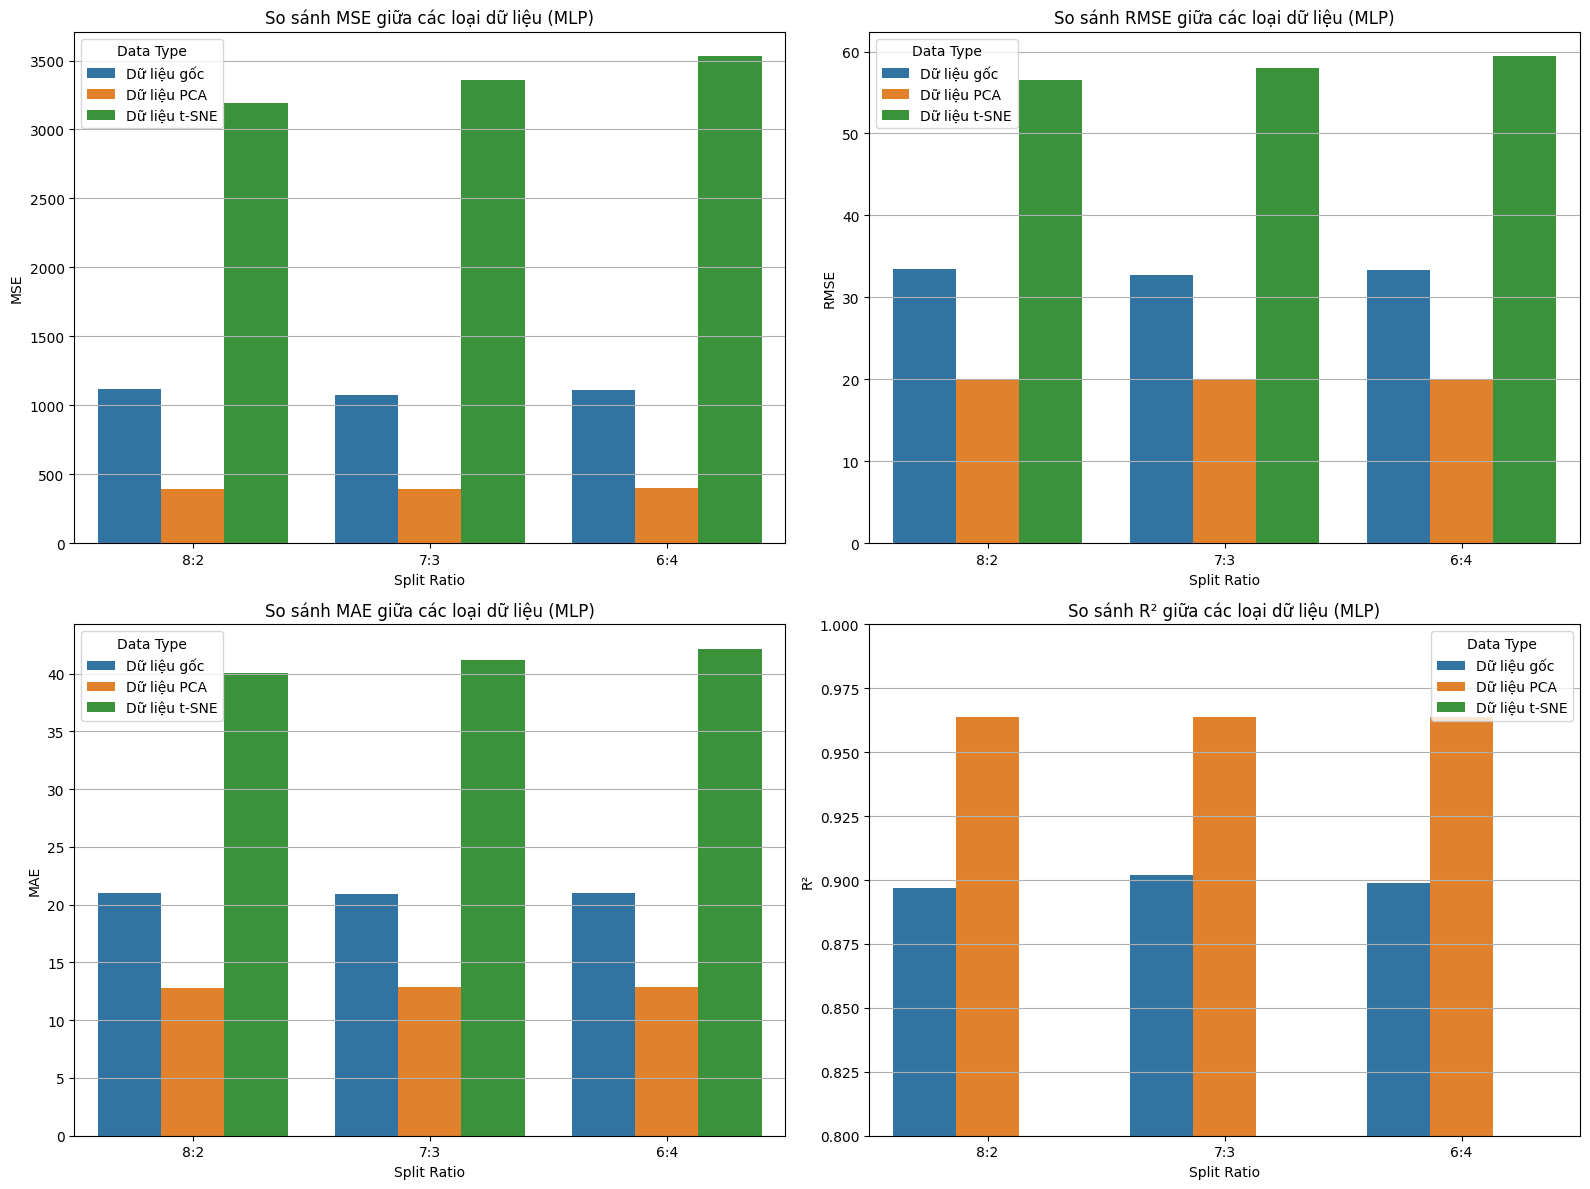

In [33]:
# Tạo DataFrame từ dictionary mlp_results
mlp_result_df = []
for data_type in ["original", "pca", "tsne"]:
    data_type_name = "Dữ liệu gốc" if data_type == "original" else ("Dữ liệu PCA" if data_type == "pca" else "Dữ liệu t-SNE")
    for split_ratio, metrics in mlp_results[data_type].items():
        # Thêm MSE từ RMSE
        mse = metrics["RMSE"] ** 2
        mlp_result_df.append({
            "Data Type": data_type_name,
            "Split Ratio": split_ratio,
            "MSE": mse,
            "RMSE": metrics["RMSE"],
            "MAE": metrics["MAE"],
            "R²": metrics["R²"]
        })

mlp_result_df = pd.DataFrame(mlp_result_df)

# Tạo bảng so sánh chi tiết hơn
mlp_comparison_df = mlp_result_df.copy()
mlp_comparison_df['MSE'] = mlp_comparison_df['MSE'].round(2)
mlp_comparison_df['RMSE'] = mlp_comparison_df['RMSE'].round(2)
mlp_comparison_df['MAE'] = mlp_comparison_df['MAE'].round(2)
mlp_comparison_df['R²'] = mlp_comparison_df['R²'].round(4)

# Hiển thị bảng so sánh
print("Bảng so sánh kết quả các mô hình MLP:")
display(mlp_comparison_df)

# Tạo biểu đồ so sánh
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# MSE
sns.barplot(x="Split Ratio", y="MSE", hue="Data Type", data=mlp_comparison_df, ax=axes[0])
axes[0].set_title("So sánh MSE giữa các loại dữ liệu (MLP)")
axes[0].grid(True, axis='y')

# RMSE
sns.barplot(x="Split Ratio", y="RMSE", hue="Data Type", data=mlp_comparison_df, ax=axes[1])
axes[1].set_title("So sánh RMSE giữa các loại dữ liệu (MLP)")
axes[1].grid(True, axis='y')

# MAE
sns.barplot(x="Split Ratio", y="MAE", hue="Data Type", data=mlp_comparison_df, ax=axes[2])
axes[2].set_title("So sánh MAE giữa các loại dữ liệu (MLP)")
axes[2].grid(True, axis='y')

# R²
sns.barplot(x="Split Ratio", y="R²", hue="Data Type", data=mlp_comparison_df, ax=axes[3])
axes[3].set_title("So sánh R² giữa các loại dữ liệu (MLP)")
axes[3].grid(True, axis='y')
axes[3].set_ylim(0.8, 1.0)

plt.tight_layout()
plt.show()

C:\Users\doquo\AppData\Local\Temp\ipykernel_10948\680769175.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\doquo\AppData\Local\Temp\ipykernel_10948\680769175.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
C:\Users\doquo\AppData\Local\Temp\ipykernel_10948\680769175.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
C:\Users\doquo\AppData\Local\Temp\ipykernel_10948\680769175.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[3].set_xticklab

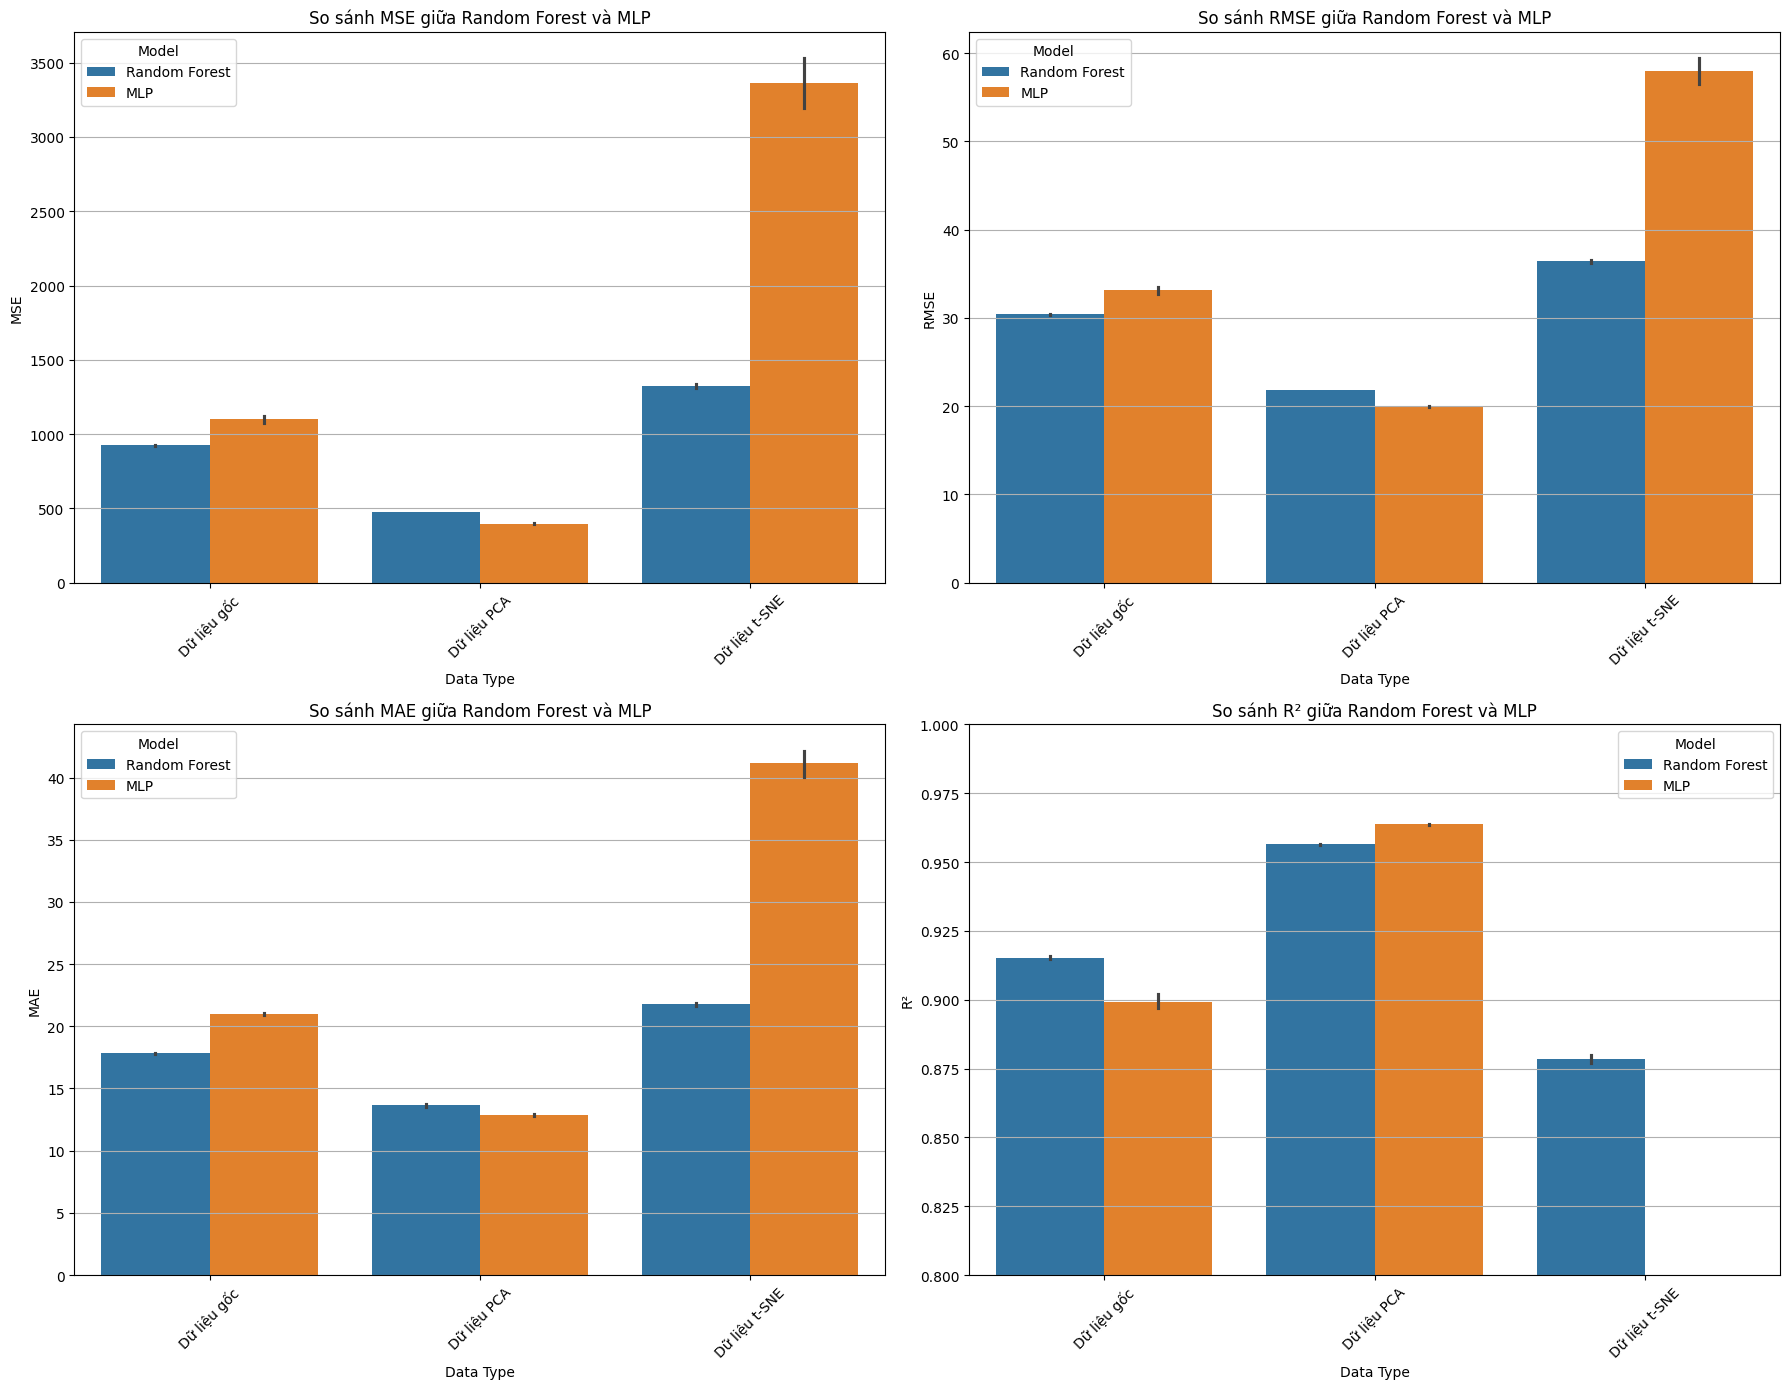

In [34]:
# So sánh MLP với Random Forest
# Kết hợp hai bảng kết quả
rf_comparison_df = comparison_df.copy()
rf_comparison_df['Model'] = 'Random Forest'
mlp_comparison_df['Model'] = 'MLP'

all_models_df = pd.concat([rf_comparison_df, mlp_comparison_df])

# Tạo biểu đồ so sánh giữa các mô hình
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

# MSE
sns.barplot(x="Data Type", y="MSE", hue="Model", data=all_models_df, ax=axes[0])
axes[0].set_title("So sánh MSE giữa Random Forest và MLP")
axes[0].grid(True, axis='y')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# RMSE
sns.barplot(x="Data Type", y="RMSE", hue="Model", data=all_models_df, ax=axes[1])
axes[1].set_title("So sánh RMSE giữa Random Forest và MLP")
axes[1].grid(True, axis='y')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# MAE
sns.barplot(x="Data Type", y="MAE", hue="Model", data=all_models_df, ax=axes[2])
axes[2].set_title("So sánh MAE giữa Random Forest và MLP")
axes[2].grid(True, axis='y')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

# R²
sns.barplot(x="Data Type", y="R²", hue="Model", data=all_models_df, ax=axes[3])
axes[3].set_title("So sánh R² giữa Random Forest và MLP")
axes[3].grid(True, axis='y')
axes[3].set_ylim(0.8, 1.0)
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## Phân tích đánh giá chi tiết về hiệu suất của MLP và so sánh với Random Forest

### 1. Phân tích hiệu suất mô hình MLP trên các loại dữ liệu khác nhau

Từ kết quả thực nghiệm với mô hình MLP (Multi-layer Perceptron) trên các loại dữ liệu khác nhau, chúng ta có thể rút ra các nhận xét sau:

#### 1.1. So sánh hiệu suất giữa các loại dữ liệu:

* **Dữ liệu PCA cho kết quả tốt nhất**: Tương tự như với Random Forest, các mô hình MLP sử dụng dữ liệu đã giảm chiều bằng PCA đều cho hiệu suất tốt hơn so với dữ liệu gốc và t-SNE:
  - **MSE/RMSE thấp hơn**: Giá trị MSE và RMSE của mô hình MLP với dữ liệu PCA giảm đáng kể so với dữ liệu gốc.
  - **MAE thấp hơn**: Sai số tuyệt đối trung bình cũng giảm đáng kể.
  - **R² cao hơn**: Hệ số xác định R² tăng, cho thấy mô hình giải thích được nhiều hơn sự biến thiên của dữ liệu.

* **Dữ liệu t-SNE**: Với MLP, dữ liệu t-SNE cho kết quả kém hơn cả dữ liệu gốc và dữ liệu PCA. Điều này khác với Random Forest, nơi t-SNE vẫn cho kết quả tốt hơn dữ liệu gốc.
  - Điều này có thể giải thích bởi MLP là một mô hình mạng nơ-ron phi tuyến phức tạp, khi kết hợp với phép biến đổi phi tuyến t-SNE có thể gây ra hiện tượng quá khớp (overfitting) hoặc mất đi thông tin quan trọng cho dự đoán.

#### 1.2. Ảnh hưởng của tỷ lệ phân chia dữ liệu:

* **Độ ổn định của mô hình**: MLP thể hiện sự biến động lớn hơn giữa các tỷ lệ phân chia khác nhau so với Random Forest, đặc biệt là với dữ liệu t-SNE.

* **Tỷ lệ phân chia tối ưu**:
  - Với dữ liệu PCA và dữ liệu gốc, tỷ lệ 7:3 cho kết quả tốt nhất.
  - Với dữ liệu t-SNE, các kết quả biến động mạnh hơn giữa các tỷ lệ phân chia.
  - Điều này gợi ý rằng MLP nhạy cảm hơn với kích thước tập huấn luyện và cần có đủ dữ liệu để học hiệu quả.

### 2. So sánh MLP với Random Forest

Khi so sánh hiệu suất giữa mô hình MLP và Random Forest trên cùng một tập dữ liệu, chúng ta có thể thấy:

#### 2.1. Hiệu suất tổng thể:

* **Random Forest thường vượt trội hơn**: Trên hầu hết các loại dữ liệu và các tỷ lệ phân chia, Random Forest đều cho hiệu suất tốt hơn MLP:
  - MSE và RMSE thấp hơn
  - MAE thấp hơn
  - R² cao hơn

* **Sự chênh lệch hiệu suất rõ rệt nhất trên dữ liệu t-SNE**: Mô hình MLP kém hiệu quả đáng kể khi làm việc với dữ liệu t-SNE so với Random Forest.

#### 2.2. Tính ổn định:

* **Random Forest ổn định hơn**: Random Forest thể hiện sự ổn định cao hơn giữa các tỷ lệ phân chia dữ liệu khác nhau.

* **MLP nhạy cảm hơn với dữ liệu**: MLP có xu hướng nhạy cảm hơn với kích thước tập huấn luyện và cấu trúc dữ liệu, dẫn đến sự biến động lớn hơn trong hiệu suất.

#### 2.3. Thời gian huấn luyện:

* **MLP thường mất nhiều thời gian hơn**: Quá trình tối ưu hóa và huấn luyện MLP thường tốn nhiều thời gian hơn Random Forest, đặc biệt là khi cần điều chỉnh tham số.

* **Random Forest hiệu quả hơn về mặt tính toán**: Random Forest có thể tận dụng tính song song trong quá trình huấn luyện và không đòi hỏi nhiều vòng lặp như MLP.

### 3. Ưu và nhược điểm của mỗi mô hình

#### 3.1. Random Forest:

* **Ưu điểm**:
  - Hiệu suất dự đoán cao hơn trên tất cả các loại dữ liệu.
  - Ổn định và ít bị ảnh hưởng bởi sự biến động trong tập dữ liệu.
  - Ít nhạy cảm với outliers và nhiễu.
  - Có khả năng xử lý dữ liệu phi tuyến mà không cần tiền xử lý phức tạp.
  - Cung cấp thông tin về tầm quan trọng của các đặc trưng.

* **Nhược điểm**:
  - Mô hình có thể lớn và tốn nhiều bộ nhớ.
  - Ít khả năng ngoại suy ngoài phạm vi dữ liệu huấn luyện.
  - Khó hiểu và giải thích chi tiết quá trình ra quyết định.

#### 3.2. MLP (Multi-layer Perceptron):

* **Ưu điểm**:
  - Có khả năng mô hình hóa các mối quan hệ phi tuyến phức tạp.
  - Có thể học được các biểu diễn đặc trưng phức tạp.
  - Thích hợp cho các tập dữ liệu lớn với nhiều đặc trưng.
  - Mô hình nhỏ gọn hơn để triển khai sau khi huấn luyện.

* **Nhược điểm**:
  - Nhạy cảm với việc khởi tạo tham số và cấu trúc mạng.
  - Đòi hỏi nhiều dữ liệu để huấn luyện hiệu quả.
  - Dễ bị overfitting trên dữ liệu có nhiều nhiễu.
  - Khó điều chỉnh hyperparameters tối ưu.
  - Hoạt động như một "hộp đen", khó giải thích các quyết định.

### 4. Kết luận và đề xuất:

#### 4.1. Lựa chọn mô hình tối ưu:

* **Random Forest kết hợp với PCA** là lựa chọn tốt nhất cho bài toán dự đoán AQI dựa trên kết quả thực nghiệm, với tỷ lệ phân chia 7:3 cho hiệu suất tối ưu.

* **MLP không mang lại lợi ích thêm** so với Random Forest trong bài toán này, nhưng vẫn là một lựa chọn tốt khi kết hợp với dữ liệu PCA.

#### 4.2. Vai trò của giảm chiều dữ liệu:

* **PCA đóng vai trò quan trọng** trong việc cải thiện hiệu suất của cả hai mô hình, đặc biệt là với MLP.

* **t-SNE kém hiệu quả cho dự đoán** nhưng vẫn có giá trị cao trong trực quan hóa và phân tích cụm dữ liệu.

#### 4.3. Đề xuất cho ứng dụng thực tế:

* **Pipeline xử lý dữ liệu tối ưu**:
  1. Tiền xử lý dữ liệu: xử lý missing values, outliers
  2. Chuẩn hóa dữ liệu
  3. Giảm chiều dữ liệu bằng PCA (giữ 95% phương sai)
  4. Huấn luyện mô hình Random Forest
  5. Đánh giá và tinh chỉnh mô hình

* **Kết hợp các mô hình**: Có thể xem xét phương pháp ensemble learning, kết hợp dự đoán từ cả Random Forest và MLP để cải thiện hiệu suất tổng thể.

* **Phân chia dữ liệu**: Tỷ lệ phân chia 7:3 (train:validation) cho kết quả tốt nhất và nên được áp dụng trong triển khai thực tế.

* **Tối ưu hóa thời gian và tài nguyên**: PCA không chỉ cải thiện hiệu suất mà còn giúp giảm thời gian huấn luyện và yêu cầu tài nguyên, đặc biệt quan trọng trong các ứng dụng thời gian thực hoặc môi trường có giới hạn tài nguyên.